# Final Project
# Kelompok 7A - OCTAGRAM
ALFAROQIH SWANDI <br>
ARIEF SULISTYO WIBOWO <br>
CICILIA RUMANAT SIAHAAN <br>
MARIFATUL HASANAH <br>
RAHMAT DIZA RAMADHAN <br>
WILSON FIRMANDA MANURUNG <br>
YANSEN CRISTOPEL SINAGA <br>
YULIA ROHMAWATI <br>

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
import warnings
warnings.filterwarnings('ignore')

# Problem Statement
Jumlah nasabah atau customer yang churn pada perusahaan perbankan (Banking) semakin meningkat. Hal ini menyebabkan pendapatan perusahaan menurun. Churn adalah istilah yang menggambarkan seorang customer berpindah ke layanan yang lain atau berhenti menggunakan layanan. Oleh karena itu perlu memprediksi nasabah atau customer bank yang akan churn berdasarkan berbagai atribut yang ada. <br>

# Objective:
- Mengidentifikasi feature importance terhadap churn.
- Melakukan segmentasi nasabah atau customer bank berdasarkan atribut yang tersedia
- Membuat dan mengembangkan model Machine Learning untuk memprediksi customer atau nasabah bank yang berpotensi churn.

# Goal
Mempertahankan customer atau nasabah bank agar tidak jadi churn sehingga pendapatan perusahaan perbankan dapat meningkat kembali.

# Business Metrics
- Model Evaluation Metric
- Churn Rate

# Dataset

In [27]:
#Dataset
from google.colab import drive
drive.mount('/content/gdrive')

df = pd.read_csv('/content/gdrive/My Drive/Final Project MSIB/Churn_Modelling.csv')
df

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0          2       0.00              1          1               1   
1          1   83807.86              1          0               1   
2          8  159660.80              3          1               0   
3          1       0.00              2          0               0   
4          2  125510.82              1          1               1   
...      ...        ...            ...        ...             ...   
9995       5       0.00              2          1               0   
9996      10   57369.61              1          1               1   
9997       7       0.00              1          0               1   
9998       3   75075.31              2          1               0   
9999       4  130142.79              1          1               0   

      EstimatedSalary  Exited  
0           101348.88       1  
1           112542.58       0  
2           113931.57       1  
3            93826.63       0  
4            79084.10       0  
...               ...     ...  
9995         96270.64       0  
9996        101699.77       0  
9997         42085.58       1  
9998         92888.52       1  
9999         38190.78       0  

[10000 rows x 14 columns]

#### Feature Dataset
- Customer ID : Merepresentasikan identifikasi unik nasabah
- Surname : Merepresentasikan last name nasabah
- CreditScore : Merepresentasikan angka yang mengestimasi kemampuan nasabah dalam melunasi utangnya tepat waktu
- Geography : Merepresentasikan wilayah nasabah
- Gender : Merepresentasikan jenis kelamin nasabah (male or female)
- Age: Merepresentasikan usia nasabah
- Tenure : Merepresentasikan jangka waktu pinjaman nasabah
- Balance : Merepresentasikan saldo pada akun nasabah
- NumOfProducts : Merepresentasikan jumlah produk yang digunakan atau dimiliki oleh nasabah
- HasCrCard : Merepresentasikan kepemilikan nasabah akan kartu kredit
- IsActiveMember : Merepresentasikan apakah member nasabah aktif atau tidak
- EstimatedSalary : Merepresentasikan estimasi gaji nasabah
- Exited : Merepresentasikan nasabah churn atau tidak oleh nasabah

# EDA & Insight

In [28]:
df.shape

(10000, 14)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [30]:
df.describe()

RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.499797   
min         0.000000       1.000000      0.00000        0.000000   
25%         0.000000       1.000000      0.00000        0.000000   
50%     97198.540000       1.000000      1.00000        1.000000   
75%    127644.240000       2.000000      1.00000        1.000000   
max    250898.090000       4.000000      1.00000        1.000000   

       EstimatedSalary        Exited  
count     10000.000000  10000.000000  
mean     100090.239881      0.203700  
std       57510.492818      0.402769  
min          11.580000      0.000000  
25%       51002.110000      0.000000  
50%      100193.915000      0.000000  
75%      149388.247500      0.000000  
max      199992.480000      1.000000

In [31]:
df.select_dtypes("object").describe()

Surname Geography Gender
count    10000     10000  10000
unique    2932         3      2
top      Smith    France   Male
freq        32      5014   5457

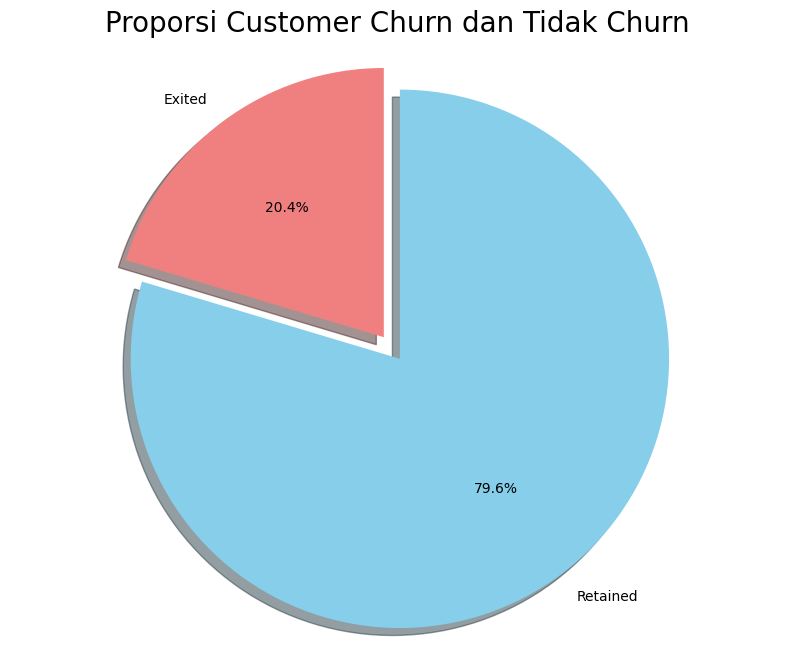

In [33]:
# Visualisasi Feature "Exited"
labels = 'Exited', 'Retained'
sizes = [df.Exited[df['Exited']==1].count(), df.Exited[df['Exited']==0].count()]
colors = ['lightcoral', 'skyblue']
explode = (0, 0.1)
#Pie Chart
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, colors=colors)
ax1.axis('equal')
plt.title("Proporsi Customer Churn dan Tidak Churn", size = 20)
plt.show()

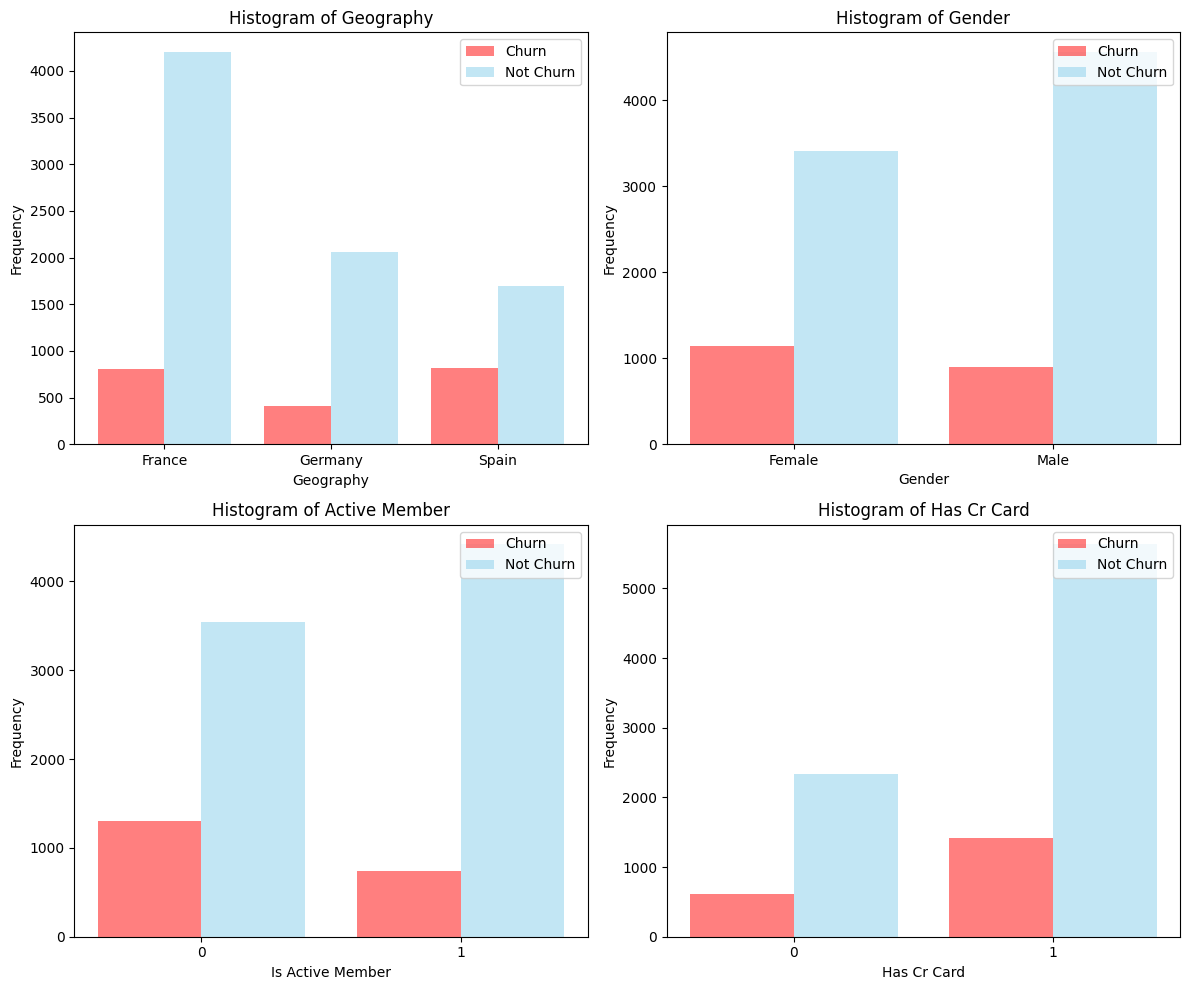

In [34]:
import matplotlib.pyplot as plt
import numpy as np

# Membuat grid 2x2
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Visualize histogram for column Geography
data_geography_churn = df[df['Exited'] == 1]['Geography']
data_geography_not_churn = df[df['Exited'] == 0]['Geography']

bins = np.arange(0, len(np.unique(data_geography_churn)) + 1) - 0.5

axes[0, 0].hist([data_geography_churn, data_geography_not_churn], alpha=0.5, label=['Churn', 'Not Churn'], bins=bins, color=['red', 'skyblue'])
axes[0, 0].legend(loc='upper right')
axes[0, 0].set_title('Histogram of Geography')
axes[0, 0].set_xlabel('Geography')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_xticks(np.arange(0, len(np.unique(data_geography_churn))))
axes[0, 0].set_xticklabels(np.unique(data_geography_churn))

# Visualize histogram for column Gender
data_gender_churn = df[df['Exited'] == 1]['Gender']
data_gender_not_churn = df[df['Exited'] == 0]['Gender']

bins = np.arange(0, len(np.unique(data_gender_churn)) + 1) - 0.5

axes[0, 1].hist([data_gender_churn, data_gender_not_churn], alpha=0.5, label=['Churn', 'Not Churn'], bins=bins, color=['red', 'skyblue'])
axes[0, 1].legend(loc='upper right')
axes[0, 1].set_title('Histogram of Gender')
axes[0, 1].set_xlabel('Gender')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_xticks(np.arange(0, len(np.unique(data_gender_churn))))
axes[0, 1].set_xticklabels(np.unique(data_gender_churn))

# Visualize histogram for column Is Active Member
data_active_member_churn = df[df['Exited'] == 1]['IsActiveMember']
data_active_member_not_churn = df[df['Exited'] == 0]['IsActiveMember']

bins = np.arange(0, len(np.unique(data_active_member_churn)) + 1) - 0.5

axes[1, 0].hist([data_active_member_churn, data_active_member_not_churn], alpha=0.5, label=['Churn', 'Not Churn'], bins=bins, color=['red', 'skyblue'])
axes[1, 0].legend(loc='upper right')
axes[1, 0].set_title('Histogram of Active Member')
axes[1, 0].set_xlabel('Is Active Member')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_xticks(np.arange(0, len(np.unique(data_active_member_churn))))
axes[1, 0].set_xticklabels(np.unique(data_active_member_churn))

# Visualize histogram for column Has Cr Card
data_has_cr_card_churn = df[df['Exited'] == 1]['HasCrCard']
data_has_cr_card_not_churn = df[df['Exited'] == 0]['HasCrCard']

bins = np.arange(0, len(np.unique(data_has_cr_card_churn)) + 1) - 0.5

axes[1, 1].hist([data_has_cr_card_churn, data_has_cr_card_not_churn], alpha=0.5, label=['Churn', 'Not Churn'], bins=bins, color=['red', 'skyblue'])
axes[1, 1].legend(loc='upper right')
axes[1, 1].set_title('Histogram of Has Cr Card')
axes[1, 1].set_xlabel('Has Cr Card')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_xticks(np.arange(0, len(np.unique(data_has_cr_card_churn))))
axes[1, 1].set_xticklabels(np.unique(data_has_cr_card_churn))

# Menampilkan grid
plt.tight_layout()
plt.show()

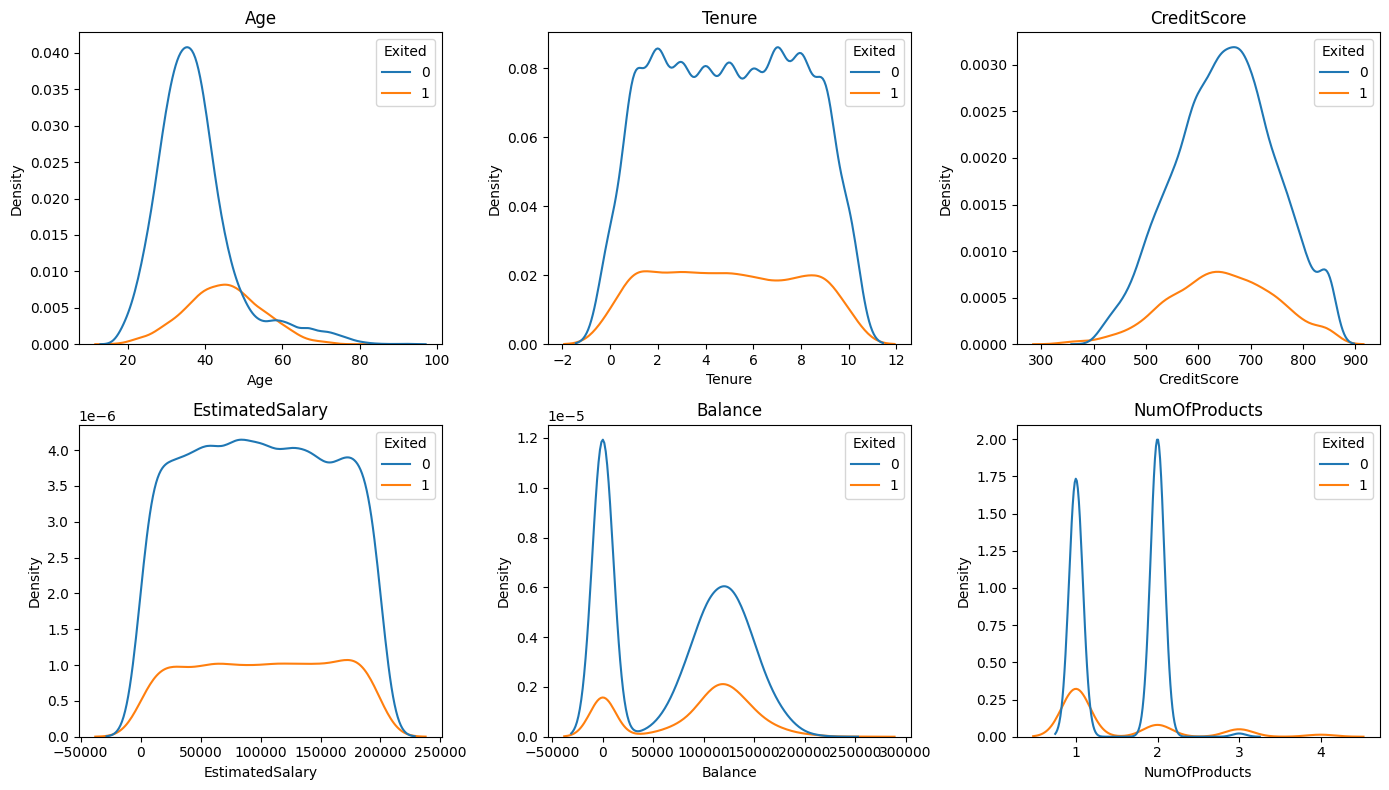

In [35]:
# Visualisasi
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 3, figsize=(14, 8))
num = ['Age', 'Tenure', 'CreditScore', 'EstimatedSalary', 'Balance', 'NumOfProducts']
hue = 'Exited'

for i in range(2):
    for j in range(3):
        if i * 3 + j < len(num):
            sns.kdeplot(data=df, x=num[i * 3 + j], hue=hue, ax=axes[i, j])
            axes[i, j].set_title(num[i * 3 + j])

plt.tight_layout()
plt.show()

# Pre-Processing

## Handle Duplicated & Redundant Data

In [36]:
df.duplicated().sum() #duplikat

0

In [37]:
df.T.duplicated().sum() #redundant

0

## Handle Missing Value

In [38]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

## Statistika Deskriptif

In [39]:
df.describe()

RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.499797   
min         0.000000       1.000000      0.00000        0.000000   
25%         0.000000       1.000000      0.00000        0.000000   
50%     97198.540000       1.000000      1.00000        1.000000   
75%    127644.240000       2.000000      1.00000        1.000000   
max    250898.090000       4.000000      1.00000        1.000000   

       EstimatedSalary        Exited  
count     10000.000000  10000.000000  
mean     100090.239881      0.203700  
std       57510.492818      0.402769  
min          11.580000      0.000000  
25%       51002.110000      0.000000  
50%      100193.915000      0.000000  
75%      149388.247500      0.000000  
max      199992.480000      1.000000

In [40]:
df.describe(exclude=np.number)

Surname Geography Gender
count    10000     10000  10000
unique    2932         3      2
top      Smith    France   Male
freq        32      5014   5457

## Handle Outliers

In [41]:
Categoric = ['Geography','Gender', 'HasCrCard','IsActiveMember', 'Exited']
Numeric = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary','NumOfProducts']

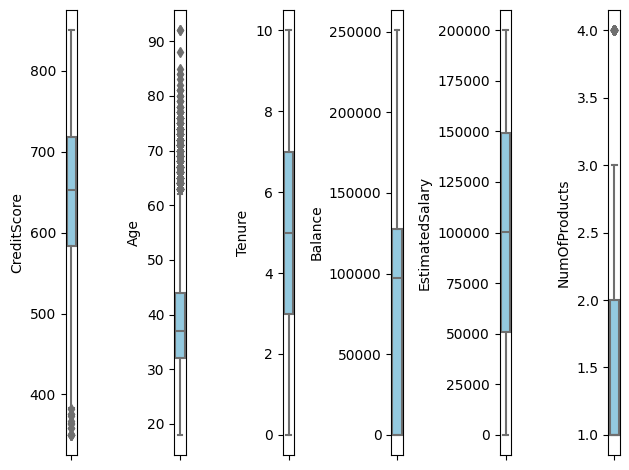

In [42]:
for i in range(0, len(Numeric)):
  plt.subplot(1, len(Numeric), i+1)
  sns.boxplot(y=df[Numeric[i]], color='skyblue', orient='v')
  plt.tight_layout()

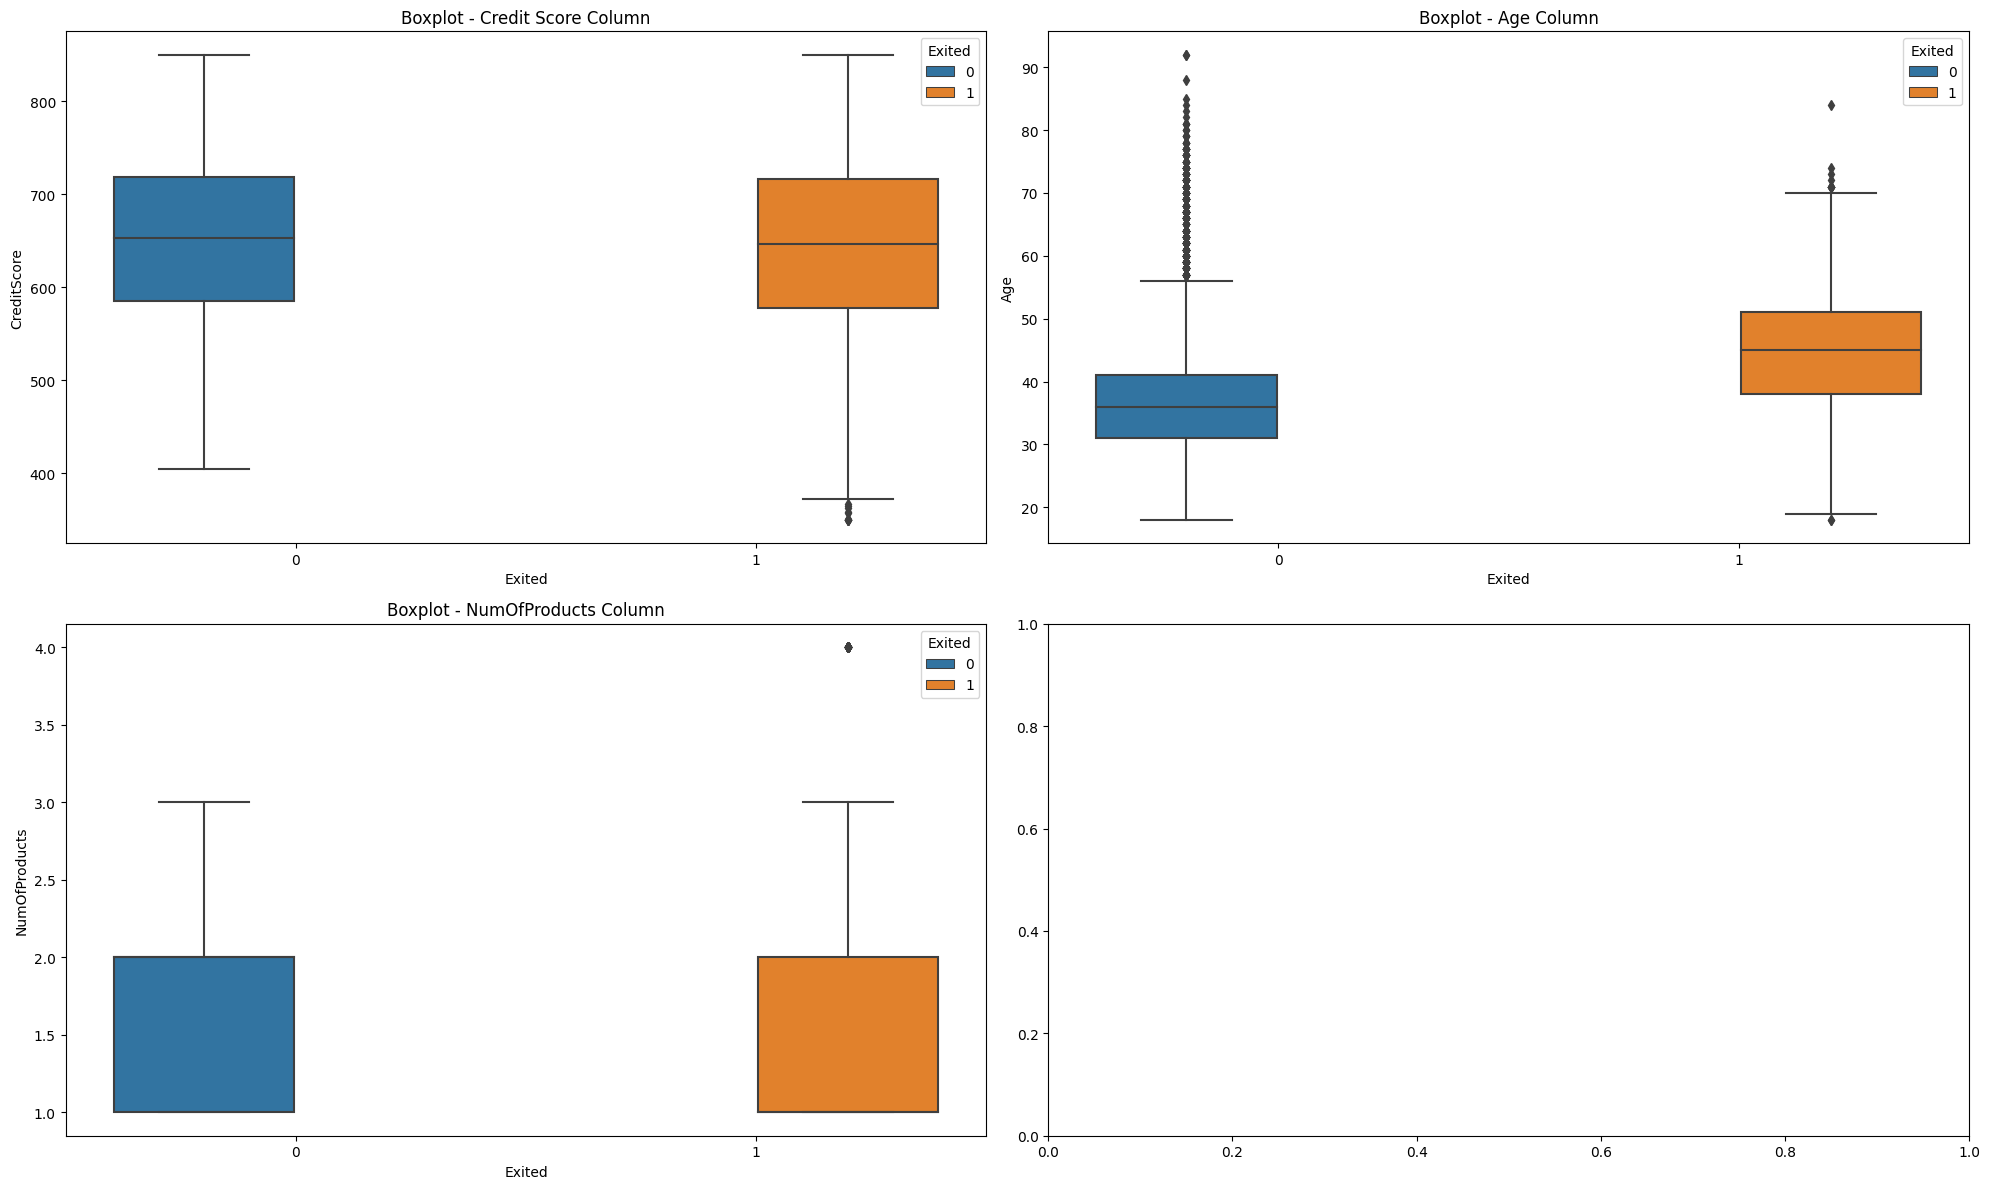

In [43]:
# hubungan kolom yang memiliki data outlier dengan kolom 'Exited'
fig, axarr = plt.subplots(2, 2, figsize=(20, 12))

sns.boxplot(y='CreditScore', x='Exited', hue='Exited', data=df, ax=axarr[0][0]).set_title('Boxplot - Credit Score Column')
sns.boxplot(y='Age', x='Exited', hue='Exited', data=df, ax=axarr[0][1]).set_title('Boxplot - Age Column')
sns.boxplot(y='NumOfProducts', x='Exited', hue='Exited', data=df, ax=axarr[1][0]).set_title('Boxplot - NumOfProducts Column')
plt.tight_layout()
plt.show()

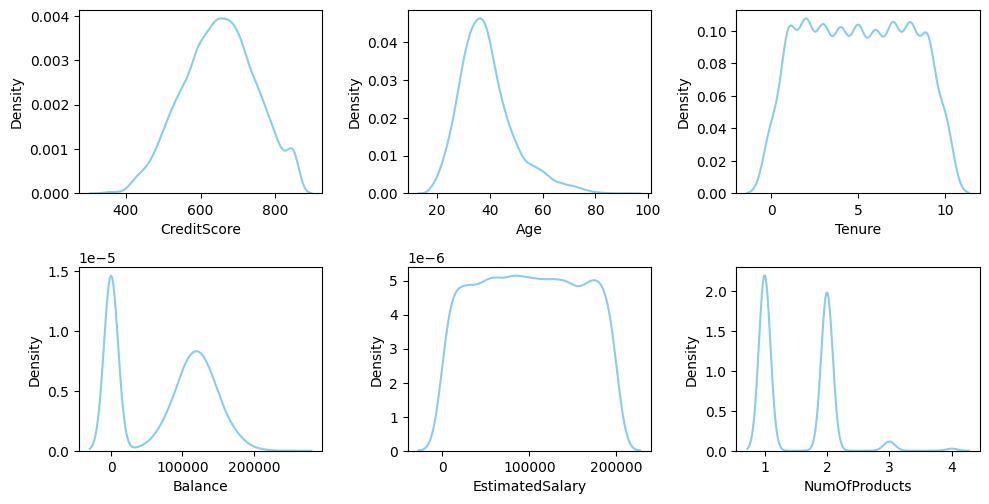

In [44]:
# distribusi data
plt.figure(figsize=(10, 15))
for i in range(0, len(Numeric)):
  plt.subplot(len(Numeric), 3, i+1)
  sns.kdeplot(x=df[Numeric[i]], color='skyblue')
  plt.xlabel(Numeric[i])
  plt.tight_layout()

## Feature Encoding

In [45]:
# Label encoding untuk feature gender

mapping_gender = {
  'Male' : 1,
  'Female' : 0
}
df['Gender'] = df['Gender'].map(mapping_gender)
df.head(7)

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France       0   42   
1          2    15647311      Hill          608     Spain       0   41   
2          3    15619304      Onio          502    France       0   42   
3          4    15701354      Boni          699    France       0   39   
4          5    15737888  Mitchell          850     Spain       0   43   
5          6    15574012       Chu          645     Spain       1   44   
6          7    15592531  Bartlett          822    France       1   50   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   
5       8  113755.78              2          1               0   
6       7       0.00              2          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0  
5        149756.71       1  
6         10062.80       0

In [46]:
# One Hot Encoding untuk feature geography
geo_encod = pd.get_dummies(df['Geography'], prefix='country')
geo_encod

country_France  country_Germany  country_Spain
0                  1                0              0
1                  0                0              1
2                  1                0              0
3                  1                0              0
4                  0                0              1
...              ...              ...            ...
9995               1                0              0
9996               1                0              0
9997               1                0              0
9998               0                1              0
9999               1                0              0

[10000 rows x 3 columns]

In [47]:
# Merge Dataframe geo_encod dengan dataframe utama
new_df = pd.concat([df, geo_encod], axis=1)
new_df.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France       0   42   
1          2    15647311      Hill          608     Spain       0   41   
2          3    15619304      Onio          502    France       0   42   
3          4    15701354      Boni          699    France       0   39   
4          5    15737888  Mitchell          850     Spain       0   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  country_France  country_Germany  country_Spain  
0        101348.88       1               1                0              0  
1        112542.58       0               0                0              1  
2        113931.57       1               1                0              0  
3         93826.63       0               1                0              0  
4         79084.10       0               0                0              1

In [48]:
# Drop feature geo dan merubah nama feature hasil encode dari geography
df2 = new_df.drop(['Geography'], axis=1)
df2.rename(
    columns={"country_France": "France", "country_Germany": "Germany", "country_Spain": "Spain"},
    inplace=True,
)

In [49]:
df2 = df2.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)
df2.head()

CreditScore  Gender  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0          619       0   42       2       0.00              1          1   
1          608       0   41       1   83807.86              1          0   
2          502       0   42       8  159660.80              3          1   
3          699       0   39       1       0.00              2          0   
4          850       0   43       2  125510.82              1          1   

   IsActiveMember  EstimatedSalary  Exited  France  Germany  Spain  
0               1        101348.88       1       1        0      0  
1               1        112542.58       0       0        0      1  
2               0        113931.57       1       1        0      0  
3               0         93826.63       0       1        0      0  
4               1         79084.10       0       0        0      1

# Classification

## Handle Class Imbalance (Classification)

In [50]:
data = df2.copy()
data['NumOfProducts'] = data['NumOfProducts'].astype(float)
data['Age'] = data['Age'].astype(float)
data['CreditScore'] = data['CreditScore'].astype(float)
data['Tenure'] = data['Tenure'].astype(float)
data

CreditScore  Gender   Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0           619.0       0  42.0     2.0       0.00            1.0          1   
1           608.0       0  41.0     1.0   83807.86            1.0          0   
2           502.0       0  42.0     8.0  159660.80            3.0          1   
3           699.0       0  39.0     1.0       0.00            2.0          0   
4           850.0       0  43.0     2.0  125510.82            1.0          1   
...           ...     ...   ...     ...        ...            ...        ...   
9995        771.0       1  39.0     5.0       0.00            2.0          1   
9996        516.0       1  35.0    10.0   57369.61            1.0          1   
9997        709.0       0  36.0     7.0       0.00            1.0          0   
9998        772.0       1  42.0     3.0   75075.31            2.0          1   
9999        792.0       0  28.0     4.0  130142.79            1.0          1   

      IsActiveMember  EstimatedSalary  Exited  France  Germany  Spain  
0                  1        101348.88       1       1        0      0  
1                  1        112542.58       0       0        0      1  
2                  0        113931.57       1       1        0      0  
3                  0         93826.63       0       1        0      0  
4                  1         79084.10       0       0        0      1  
...              ...              ...     ...     ...      ...    ...  
9995               0         96270.64       0       1        0      0  
9996               1        101699.77       0       1        0      0  
9997               1         42085.58       1       1        0      0  
9998               0         92888.52       1       0        1      0  
9999               0         38190.78       0       1        0      0  

[10000 rows x 13 columns]

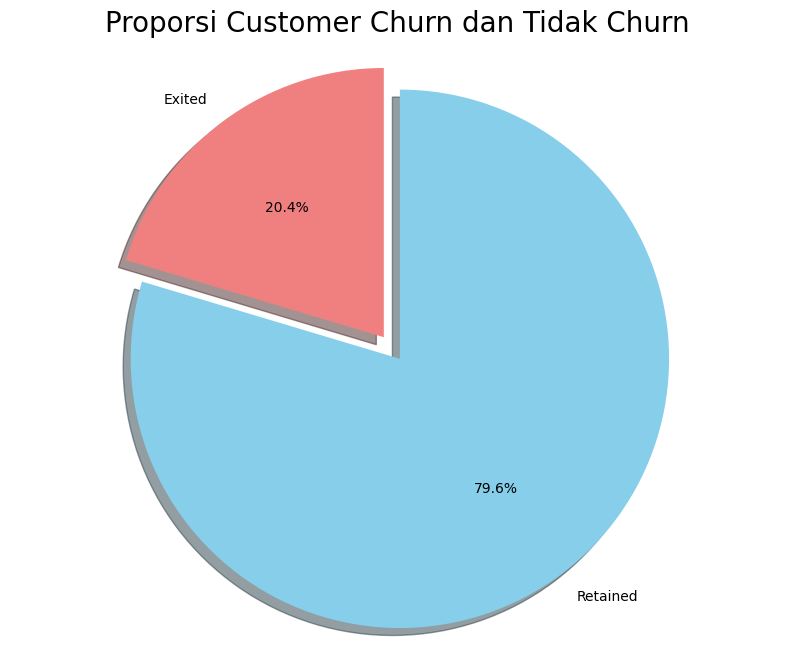

In [52]:
# Feature Exited
labels = 'Exited', 'Retained'
sizes = [data.Exited[data['Exited']==1].count(), data.Exited[data['Exited']==0].count()]
colors = ['lightcoral', 'skyblue']
explode = (0, 0.1)
# Pie Chart
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, colors=colors)
ax1.axis('equal')
plt.title("Proporsi Customer Churn dan Tidak Churn", size = 20)
plt.show()

In [53]:
# SMOTE
from imblearn.over_sampling import SMOTE

# Feature X dan Y
X = data.drop('Exited', axis=1)
y = data['Exited']

# Handling Class Imbalance
smote = SMOTE(random_state=1)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Hasil SMOTE
df_SMOTE = pd.concat([pd.DataFrame(X_resampled), pd.DataFrame(y_resampled, columns=['Exited'])], axis=1)

exited_counts = df_SMOTE['Exited'].value_counts()
print("Jumlah data setelah SMOTE:", len(df_SMOTE))

Jumlah data setelah SMOTE: 15926


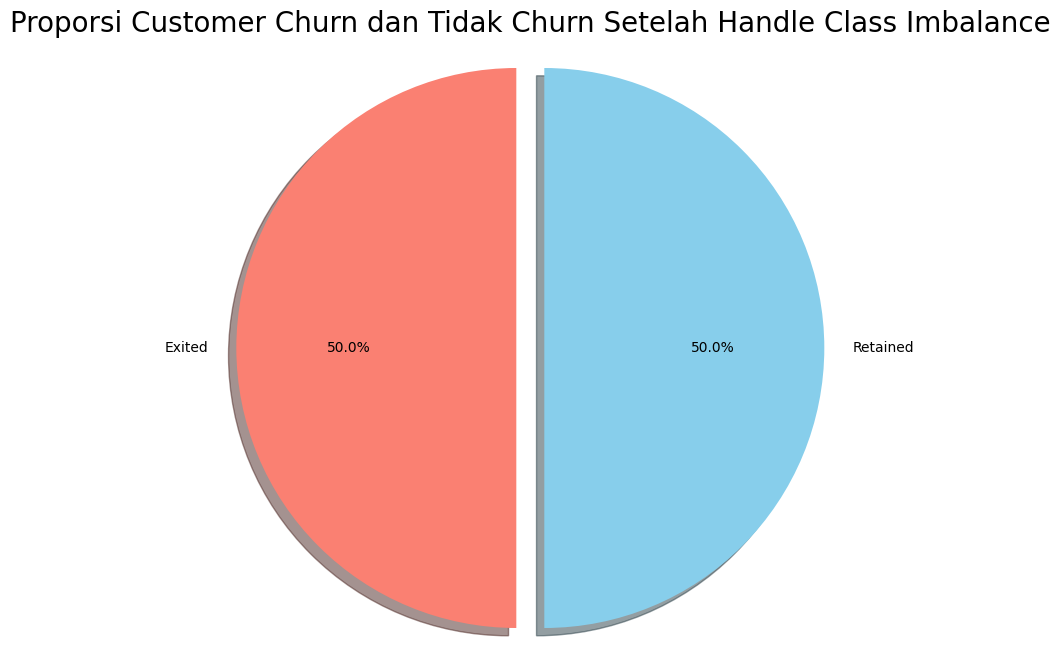

In [54]:
# Visualisasi setelah handle class imbalance
# Feature Exited
labels = 'Exited', 'Retained'
sizes = [df_SMOTE.Exited[df_SMOTE['Exited']==1].count(), df_SMOTE.Exited[df_SMOTE['Exited']==0].count()]
colors = ['salmon', 'skyblue']
explode = (0, 0.1)
# Pie Chart
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, colors=colors)
ax1.axis('equal')
plt.title("Proporsi Customer Churn dan Tidak Churn Setelah Handle Class Imbalance", size = 20)
plt.show()

In [55]:
# data setelah handle class imbalance
df_SMOTE

CreditScore  Gender        Age    Tenure        Balance  NumOfProducts  \
0       619.000000       0  42.000000  2.000000       0.000000       1.000000   
1       608.000000       0  41.000000  1.000000   83807.860000       1.000000   
2       502.000000       0  42.000000  8.000000  159660.800000       3.000000   
3       699.000000       0  39.000000  1.000000       0.000000       2.000000   
4       850.000000       0  43.000000  2.000000  125510.820000       1.000000   
...            ...     ...        ...       ...            ...            ...   
15921   458.109899       0  42.102841  3.000000  104455.048209       1.847518   
15922   632.105684       0  34.934108  4.195607  174531.728512       1.804393   
15923   687.280148       0  30.540814  4.000000   78824.350975       1.420222   
15924   636.767407       0  28.669566  3.330434       0.000000       1.667391   
15925   571.174679       0  43.782281  4.584529       0.000000       1.415471   

       HasCrCard  IsActiveMember  EstimatedSalary  France  Germany  Spain  \
0              1               1    101348.880000       1        0      0   
1              0               1    112542.580000       0        0      1   
2              1               0    113931.570000       1        0      0   
3              0               0     93826.630000       1        0      0   
4              1               1     79084.100000       0        0      1   
...          ...             ...              ...     ...      ...    ...   
15921          1               1    183689.618873       0        1      0   
15922          1               0    172868.200417       0        0      0   
15923          1               0    121731.816514       0        1      0   
15924          0               0    100398.241511       1        0      0   
15925          0               0     10394.094326       0        0      0   

       Exited  
0           1  
1           0  
2           1  
3           0  
4           0  
...       ...  
15921       1  
15922       1  
15923       1  
15924       1  
15925       1  

[15926 rows x 13 columns]

### New Function

In [56]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_validate

def eval_classification(model):
  y_pred = model.predict(X_test)
  y_pred_train = model.predict(X_train)
  y_pred_proba = model.predict_proba(X_test)
  y_pred_proba_train = model.predict_proba(X_train)

  print('Accuracy (Test Set): %.2f' % accuracy_score (y_test, y_pred))
  print('Precission (Test Set): %.2f' % precision_score (y_test, y_pred))
  print('Recall (Test Set): %.2f' % recall_score (y_test, y_pred))
  print('F1-Score (Test Set): %.2f' % f1_score (y_test, y_pred))
  print("")

  print('AUC (test-proba): %.2f' % roc_auc_score (y_test, y_pred_proba[:,1]))
  print('AUC (train-proba): %.2f' % roc_auc_score (y_train, y_pred_proba_train[:,1]))
  print("")

  score = cross_validate(model, X, y, cv=5, scoring='roc_auc', return_train_score=True)
  print('roc_auc (crossval train): '+ str(score['train_score'].mean()))
  print('roc_auc (crossval test): '+ str(score['test_score'].mean()))

def show_best_hyperparameter(model):
    params = model.best_estimator_.get_params()
    for key, value in params.items():
        print(f'{key}: {value}')

## Random Forest

### Split Data

In [57]:
from sklearn.model_selection import train_test_split

#Feature
X = df_SMOTE.drop('Exited', axis=1)
y = df_SMOTE['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [58]:
X_train.head()

CreditScore  Gender        Age    Tenure        Balance  NumOfProducts  \
13555   645.185430       0  51.567670  2.378447  148559.984163       1.000000   
1665    749.000000       1  42.000000  1.000000  129776.720000       2.000000   
14878   757.016734       0  51.491633  4.432776  109580.913733       1.432776   
7471    658.000000       0  55.000000  8.000000  119327.930000       1.000000   
2582    656.000000       0  46.000000  5.000000  113402.140000       2.000000   

       HasCrCard  IsActiveMember  EstimatedSalary  France  Germany  Spain  
13555          0               0    156965.264279       1        0      0  
1665           0               1    143538.510000       1        0      0  
14878          0               0     26084.403591       0        0      0  
7471           0               1    119439.660000       0        1      0  
2582           1               1    138849.060000       1        0      0

### Feature Transformation : Robust Scalling

In [59]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
X_train = scaler.fit_transform(X_train.astype(float))
X_test = scaler.transform(X_test.astype(float))

### Modelling

In [60]:
from sklearn.ensemble import RandomForestClassifier
#latih model pada data train
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

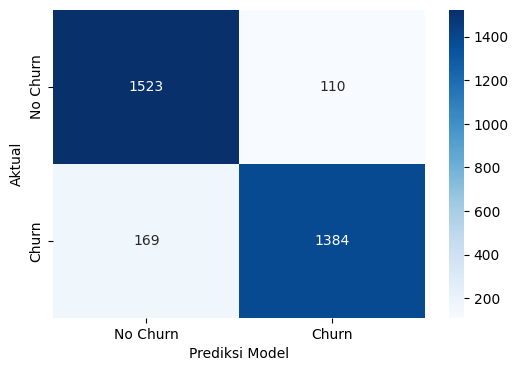

In [61]:
#visualisasi confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = rf.predict(X_test)
confusion_mat = confusion_matrix(y_test, y_pred)

#heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Prediksi Model')
plt.ylabel('Aktual')
class_names = ['No Churn', 'Churn']
tick_marks = [0.5, 1.5]
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

plt.show()

### Evaluasi Model dan Cek Overfitting-Underfitting

In [62]:
eval_classification(rf)

Accuracy (Test Set): 0.91
Precission (Test Set): 0.93
Recall (Test Set): 0.89
F1-Score (Test Set): 0.91

AUC (test-proba): 0.97
AUC (train-proba): 1.00

roc_auc (crossval train): 1.0
roc_auc (crossval test): 0.960704784647237


berdasarkan roc_auc data training dan testing pada cross-validation, model tidak mengalami **overfitting atau underfitting**

**Hasil Evaluasi Model Classification dengan Random Forest** <br>
- Akurasi (Accuracy) pada data uji adalah 0.91, menunjukkan model cukup baik dalam memprediksi kelas.
- Presisi (Precision) pada data uji adalah 0.93, artinya sebagian besar prediksi positif model benar.
- Recall pada data uji adalah 0.89, menunjukkan model baik dalam mengidentifikasi instance positif yang sebenarnya.
- F1-Score adalah 0.91, menggabungkan presisi dan recall dengan baik.
<br>
<br>
- AUC pada data uji (test-proba) adalah 0.97, menunjukkan kemampuan model dalam membedakan antara kelas positif dan negatif.
- AUC pada data pelatihan (train-proba) adalah 1.0, menandakan pemisahan sempurna.

*Model Random Forest tersebut memiliki performa model yang baik*

### Learning Curve

param value: 1; train: 0.9999999999999999; test: 0.9647662564879463
param value: 3; train: 0.9956244316123357; test: 0.9636379265542582
param value: 5; train: 0.988691987489926; test: 0.9622412658430497
param value: 7; train: 0.983035738491151; test: 0.9611210193493896
param value: 9; train: 0.9785742311209037; test: 0.959933739450618
param value: 11; train: 0.9747355903714822; test: 0.9583793530803228
param value: 13; train: 0.9718364867296114; test: 0.9576593354465943
param value: 15; train: 0.9694028879638598; test: 0.9566451594586698
param value: 17; train: 0.9674212883207272; test: 0.9564405104160054
param value: 19; train: 0.9651429810746932; test: 0.954262713378172
param value: 21; train: 0.9633293407565686; test: 0.9536258960296116
param value: 23; train: 0.9624396862130408; test: 0.9537335437919378
param value: 25; train: 0.9612062757391814; test: 0.9536676933292692
param value: 27; train: 0.9599042274487188; test: 0.953292306260644
param value: 29; train: 0.9580316350094764; 

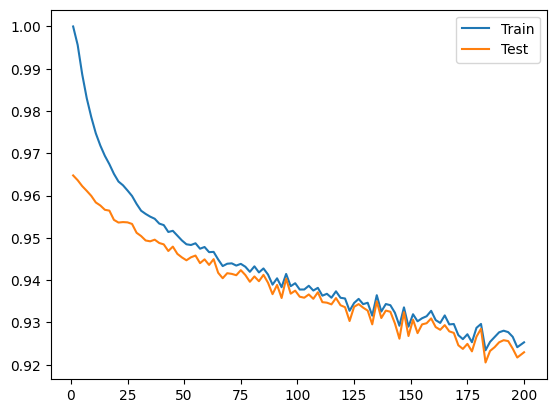

In [63]:
#learning curve
param_values = [int(x) for x in np.linspace(1, 200, 100)]

train_scores = []
test_scores = []

for c in param_values:
  model = RandomForestClassifier(n_estimators=200, min_samples_leaf=c)
  model.fit(X_train, y_train)

  # eval on train
  y_pred_train_proba = model.predict_proba(X_train)
  train_auc = roc_auc_score(y_train, y_pred_train_proba[:,1])
  train_scores.append(train_auc)

  # eval on test
  y_pred_proba = model.predict_proba(X_test)
  test_auc = roc_auc_score(y_test, y_pred_proba[:,1])
  test_scores.append(test_auc)

  print('param value: ' + str(c) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc))


plt.plot(param_values, train_scores, label='Train')
plt.plot(param_values, test_scores, label='Test')
plt.legend()
plt.show()

### Hyperparameter Tuning : jika terjadi overfitting

In [64]:
# tuning hyperparameter RF + oversampling
# from sklearn.model_selection import RandomizedSearchCV

# n_estimators = [int(x) for x in np.linspace(1, 200, 50)]
# criterion = ['gini', 'entropy']
# max_depth = [int(x) for x in np.linspace(2, 100, 50)]
# min_samples_split = [int(x) for x in np.linspace(2, 20, 10)]
# min_samples_leaf = [int(x) for x in np.linspace(2, 20, 10)]
# hyperparameters = dict(n_estimators=n_estimators, criterion=criterion, max_depth=max_depth,
#                        min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)

# rf = RandomForestClassifier(random_state=42)
# rs = RandomizedSearchCV(rf, hyperparameters, scoring='roc_auc', random_state=1, cv=5)
# rs.fit(X_train, y_train)

# eval_classification(rs)

### Feature Importance

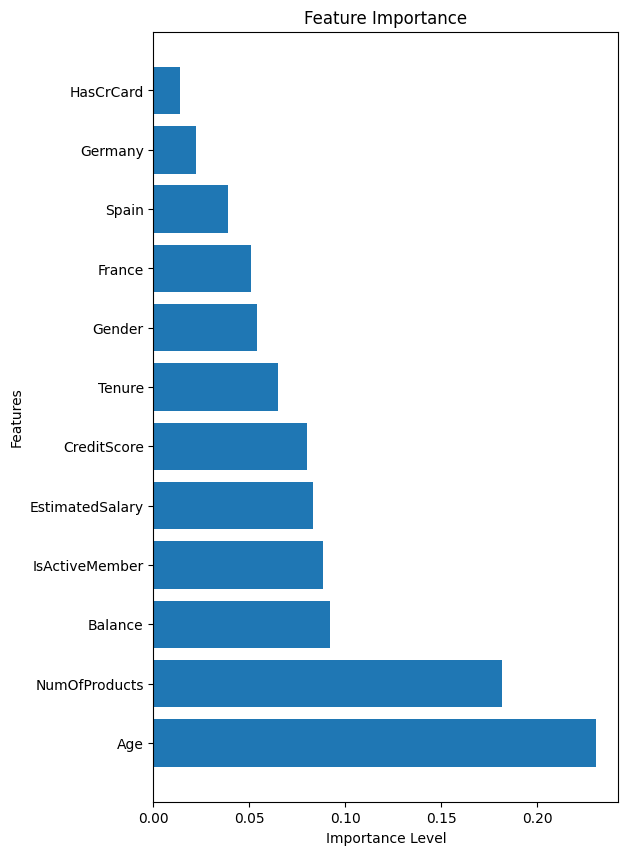

In [65]:
# feature importance
feature_importance = rf.feature_importances_
feature_names = ['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance',
                 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
                 'EstimatedSalary', 'France', 'Germany', 'Spain']
sorted_idx = feature_importance.argsort()[::-1]

# visualisasi
plt.figure(figsize=(6, 10))
plt.barh(range(len(feature_importance)), feature_importance[sorted_idx])
plt.yticks(range(len(feature_importance)), [feature_names[i] for i in sorted_idx])
plt.xlabel("Importance Level")
plt.ylabel("Features")
plt.title("Feature Importance")
plt.show()

## Decision Tree

### Split Data

In [66]:
from sklearn.model_selection import train_test_split

#Feature
X = df_SMOTE.drop('Exited', axis=1)
y = df_SMOTE['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Feature Transformation

In [67]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
X_train = scaler.fit_transform(X_train.astype(float))
X_test = scaler.transform(X_test.astype(float))

### Modelling

In [68]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

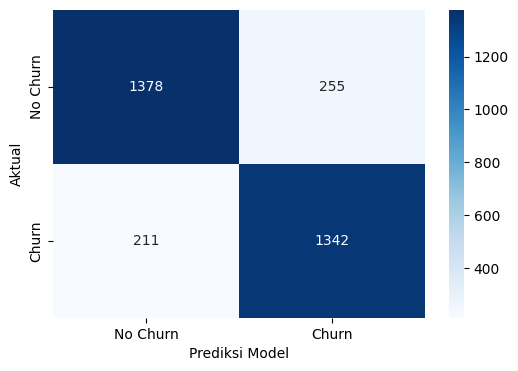

In [69]:
#visualisasi confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = dt.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

#heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Prediksi Model')
plt.ylabel('Aktual')
class_names = ['No Churn', 'Churn']
tick_marks = [0.5, 1.5]
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

plt.show()

### Evaluasi Model dan Cek Overfitting-Underfitting

In [70]:
eval_classification(dt)

Accuracy (Test Set): 0.85
Precission (Test Set): 0.84
Recall (Test Set): 0.86
F1-Score (Test Set): 0.85

AUC (test-proba): 0.85
AUC (train-proba): 1.00

roc_auc (crossval train): 1.0
roc_auc (crossval test): 0.8491893712126231


model decision tree diatas terindikasi mengalami **overfitting** berdasarkan nilai roc_auc cross validation antara data testing dan data training.

### Learning Curve

param value: 1; train: 1.0; test: 0.8558742358684709
param value: 2; train: 0.9983893526357168; test: 0.8867894508347434
param value: 3; train: 0.9955664776354087; test: 0.8993351469155366
param value: 4; train: 0.9924890635435843; test: 0.9099214959963313
param value: 5; train: 0.9896290477211506; test: 0.9122934927519146
param value: 6; train: 0.9865813438224733; test: 0.9183554813018202
param value: 7; train: 0.9845240207712573; test: 0.9196872773357296
param value: 8; train: 0.9820549201114965; test: 0.922073075086483
param value: 9; train: 0.9801016381887503; test: 0.925930058922363
param value: 10; train: 0.9780741608811272; test: 0.9304069045984522
param value: 11; train: 0.9764590526749033; test: 0.9322688560039651
param value: 12; train: 0.9754462443900599; test: 0.9342370750722876
param value: 13; train: 0.9740013998664212; test: 0.9366609241382955
param value: 14; train: 0.9729951842623468; test: 0.9362713417603524
param value: 15; train: 0.972046762439218; test: 0.937458424

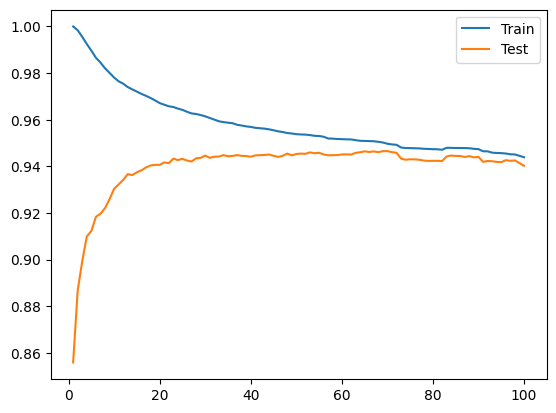

In [71]:
#learning curve
param_values = [int(x) for x in np.linspace(1, 100, 99)]
train_scores = []
test_scores = []

for c in param_values:
  model = DecisionTreeClassifier(min_samples_leaf=c)
  model.fit(X_train, y_train)

  # eval on train
  y_pred_train_proba = model.predict_proba(X_train)
  train_auc = roc_auc_score(y_train, y_pred_train_proba[:,1])
  train_scores.append(train_auc)

  # eval on test
  y_pred_proba = model.predict_proba(X_test)
  test_auc = roc_auc_score(y_test, y_pred_proba[:,1])
  test_scores.append(test_auc)

  print('param value: ' + str(c) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc))


plt.plot(param_values, train_scores, label='Train')
plt.plot(param_values, test_scores, label='Test')
plt.legend()
plt.show()

### Hyperparameter Tuning : jika terjadi overfitting

In [72]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
import numpy as np

# List of hyperparameter
max_depth = [int(x) for x in np.linspace(1, 110, num = 30)]
min_samples_split = [2, 5, 10, 100]
min_samples_leaf = [1, 2, 4, 10, 20, 50]
max_features = ['auto', 'sqrt']
criterion = ['gini','entropy']
splitter = ['best','random']
hyperparameters = dict(max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf,
                       max_features=max_features, criterion=criterion, splitter=splitter
                       )

# Inisialisasi Model
dt = DecisionTreeClassifier(random_state=42)
model_dt = RandomizedSearchCV(dt, hyperparameters, cv=5, scoring='precision')
model_dt.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [1, 4, 8, 12, 16, 19, 23,
                                                      27, 31, 34, 38, 42, 46,
                                                      49, 53, 57, 61, 64, 68,
                                                      72, 76, 79, 83, 87, 91,
                                                      94, 98, 102, 106, 110],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4, 10, 20,
                                                             50],
                                        'min_samples_split': [2, 5, 10, 100],
                                        'splitter': ['best', 'random']},
                   scoring='precision')

#### Best Hyperparameter

In [73]:
show_best_hyperparameter(model_dt)

ccp_alpha: 0.0
class_weight: None
criterion: gini
max_depth: 76
max_features: auto
max_leaf_nodes: None
min_impurity_decrease: 0.0
min_samples_leaf: 1
min_samples_split: 100
min_weight_fraction_leaf: 0.0
random_state: 42
splitter: best


#### Modelling dengan best hyperparameter

In [74]:
from sklearn.tree import DecisionTreeClassifier

# Hyperparameter
dt_hyperparameters = {
    'ccp_alpha': 0.0,
    'class_weight': None,
    'criterion': 'gini',
    'max_depth': 76,
    'max_features': 'auto',
    'max_leaf_nodes': None,
    'min_impurity_decrease': 0.0,
    'min_samples_leaf': 1,
    'min_samples_split': 100,
    'min_weight_fraction_leaf': 0.0,
    'random_state': 42,
    'splitter': 'best'
}

# Membuat model Decision Tree dengan hyperparameter yang baru
best_dt_model = DecisionTreeClassifier(**dt_hyperparameters)

# Melatih model menggunakan data pelatihan
best_dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=76, max_features='auto', min_samples_split=100,
                       random_state=42)

#### Evaluasi Model dengan model yang sudah menggunakan best hyperparameter

In [75]:
eval_classification(best_dt_model)

Accuracy (Test Set): 0.83
Precission (Test Set): 0.83
Recall (Test Set): 0.82
F1-Score (Test Set): 0.83

AUC (test-proba): 0.91
AUC (train-proba): 0.94

roc_auc (crossval train): 0.9359635285251496
roc_auc (crossval test): 0.9025091443698499


**Hasil Evaluasi Model Classification dengan Random Decision Tree (sudah dilakukan hyperparameter tuning)** <br>
- Akurasi (Accuracy) pada data uji adalah 0.83, menunjukkan model cukup baik dalam memprediksi kelas.
- Presisi (Precision) pada data uji adalah 0.83, artinya sebagian besar prediksi positif model benar.
- Recall pada data uji adalah 0.82, menunjukkan model baik dalam mengidentifikasi instance positif yang sebenarnya.
- F1-Score adalah 0.83, menggabungkan presisi dan recall dengan baik.
<br>
<br>
- AUC pada data uji (test-proba) adalah 0.91, menunjukkan kemampuan model dalam membedakan antara kelas positif dan negatif.
- AUC pada data pelatihan (train-proba) adalah 0.94, menandakan pemisahan sempurna.

*Model Decision Tree (sudah dilakukan hyperparameter tuning) tersebut memiliki performa model yang cukup baik*

#### Visualisasi Model Decision Tree

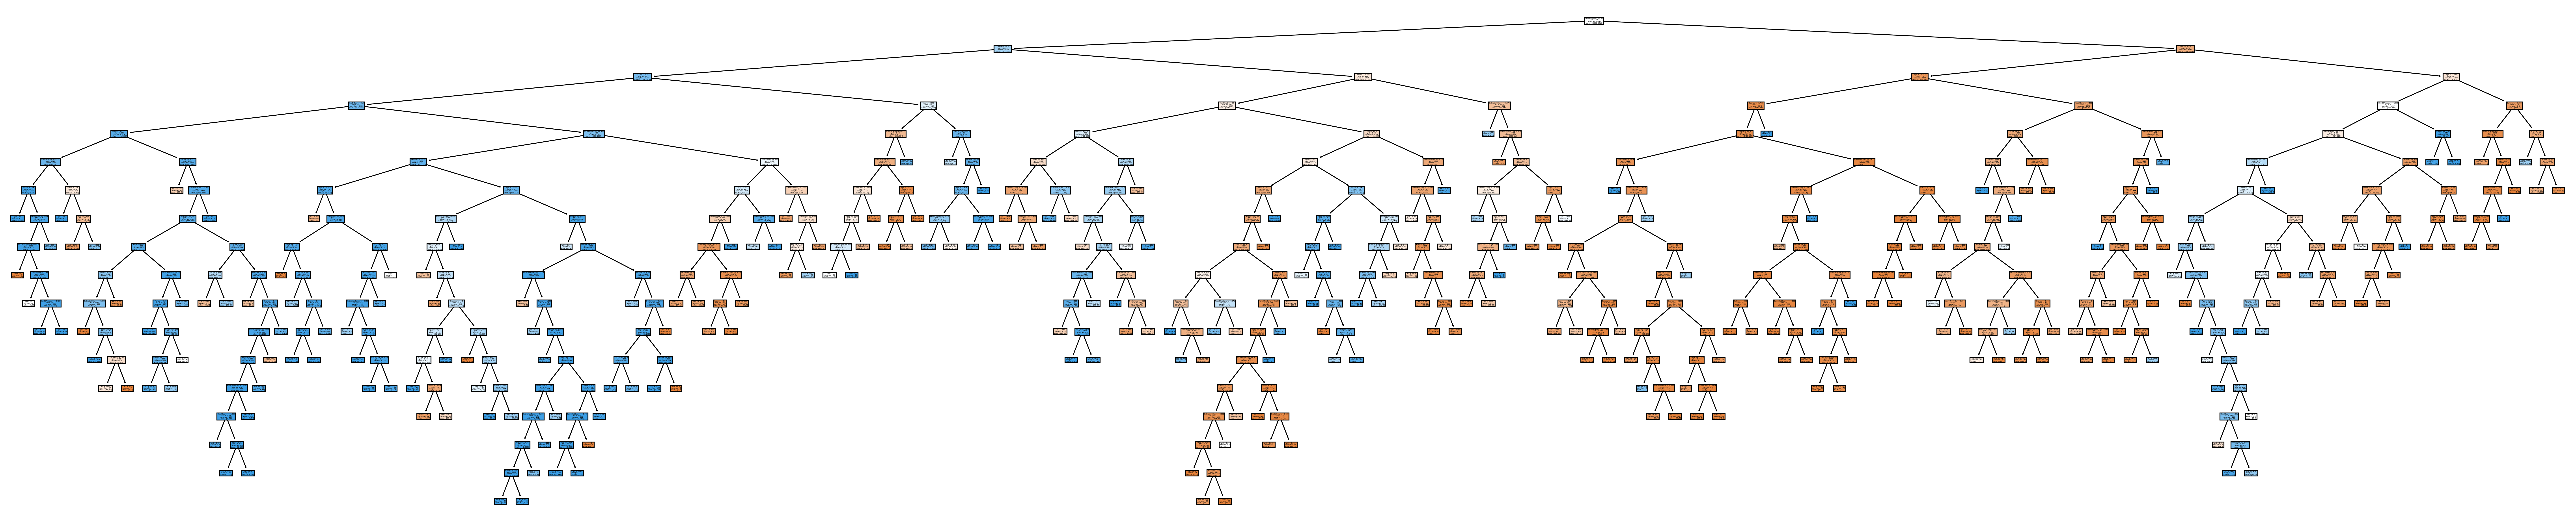

In [76]:
# visualisasi decision tree
from sklearn.tree import plot_tree

fn = ['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance',
      'NumOfProducts', 'HasCrCard', 'IsActiveMember',
      'EstimatedSalary', 'France', 'Germany', 'Spain']
plt.figure(figsize=(50,10), dpi=300)
plot_tree(best_dt_model, feature_names=fn, filled=True)
plt.show()

### Feature Importance

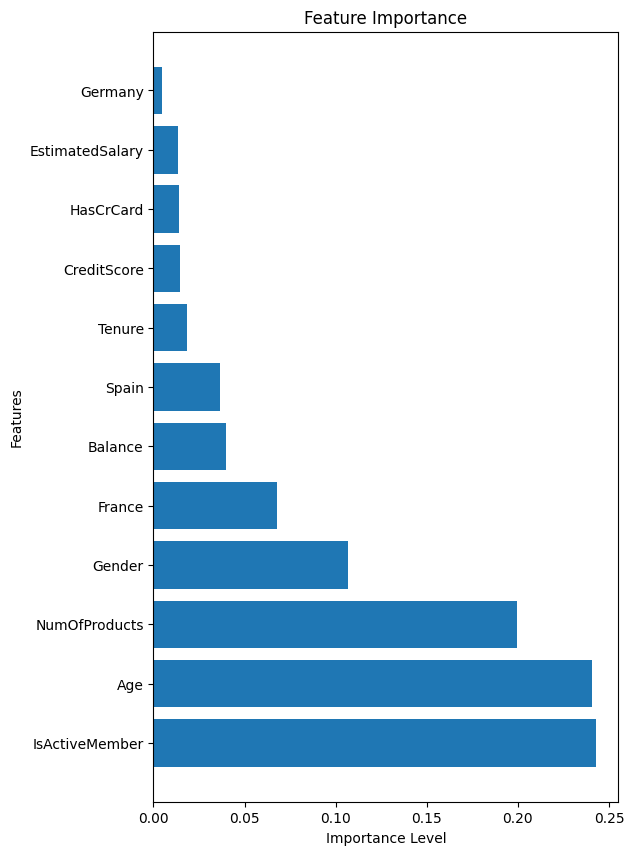

In [77]:
# feature importance
feature_importance = best_dt_model.feature_importances_
feature_names = ['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance',
                 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
                 'EstimatedSalary', 'France', 'Germany', 'Spain']
sorted_idx = feature_importance.argsort()[::-1]

# visualisasi
plt.figure(figsize=(6, 10))
plt.barh(range(len(feature_importance)), feature_importance[sorted_idx])
plt.yticks(range(len(feature_importance)), [feature_names[i] for i in sorted_idx])
plt.xlabel("Importance Level")
plt.ylabel("Features")
plt.title("Feature Importance")
plt.show()

## SVM (Support Vector Machine)

### Split Data

In [78]:
from sklearn.model_selection import train_test_split

#Feature
X = df_SMOTE.drop('Exited', axis=1)
y = df_SMOTE['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Feature Transformation : Robust Scalling

In [79]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
X_train = scaler.fit_transform(X_train.astype(float))
X_test = scaler.transform(X_test.astype(float))

### Modelling

In [80]:
from sklearn.svm import SVC

svm = SVC(probability=True)
svm.fit(X_train, y_train)

SVC(probability=True)

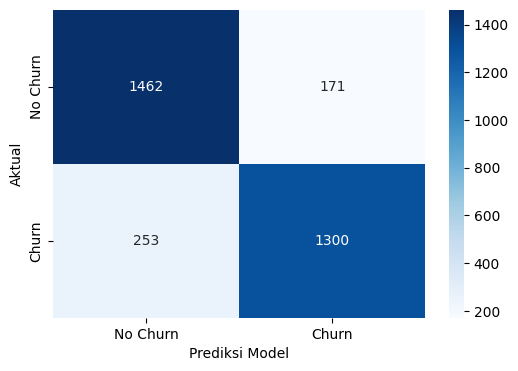

In [81]:
#visualisasi confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = svm.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

#heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Prediksi Model')
plt.ylabel('Aktual')
class_names = ['No Churn', 'Churn']
tick_marks = [0.5, 1.5]
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

plt.show()

### Evaluasi Model dan Cek Overfitting-Underfitting

In [82]:
eval_classification (svm)

Accuracy (Test Set): 0.87
Precission (Test Set): 0.88
Recall (Test Set): 0.84
F1-Score (Test Set): 0.86

AUC (test-proba): 0.94
AUC (train-proba): 0.94

roc_auc (crossval train): 0.5952592694522176
roc_auc (crossval test): 0.5926444729534024


**Hasil Evaluasi Model Classification dengan SVM** <br>
- Akurasi (Accuracy) pada data uji adalah 0.87, menunjukkan model cukup baik dalam memprediksi kelas.
- Presisi (Precision) pada data uji adalah 0.88, artinya sebagian besar prediksi positif model benar.
- Recall pada data uji adalah 0.84, menunjukkan model baik dalam mengidentifikasi instance positif yang sebenarnya.
- F1-Score adalah 0.86, menggabungkan presisi dan recall dengan baik.
<br>
<br>
- AUC pada data uji (test-proba) adalah 0.94, menunjukkan kemampuan model dalam membedakan antara kelas positif dan negatif.
- AUC pada data pelatihan (train-proba) adalah 0.94, menandakan pemisahan sempurna.
- ROC AUC pada cross validation tidak mengindikasikan terjadinya overfitting ataupun underfitting akan tetapi nilainya masih kecil sehingga kinerja model masih kurang baik.

## Naive Bayes

### Split Data

In [83]:
from sklearn.model_selection import train_test_split

#Feature
X = df_SMOTE.drop('Exited', axis=1)
y = df_SMOTE['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Feature Transformation : Robust Scalling

In [84]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
X_train = scaler.fit_transform(X_train.astype(float))
X_test = scaler.transform(X_test.astype(float))

### Modelling

In [85]:
from sklearn.naive_bayes import GaussianNB

# inisialisasi dan latih model pada data train
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

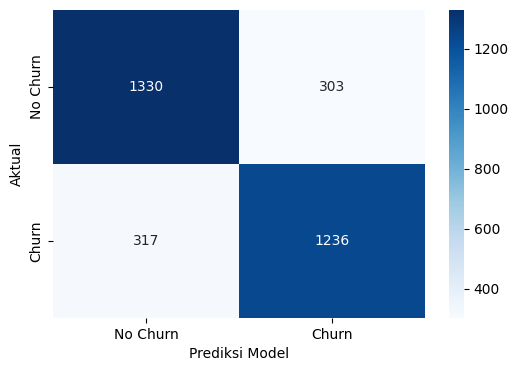

In [86]:
#visualisasi confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = nb.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Prediksi Model')
plt.ylabel('Aktual')
class_names = ['No Churn', 'Churn']
tick_marks = [0.5, 1.5]
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

plt.show()

### Evaluasi Model dan Cek Overfitting-Underfitting

In [87]:
eval_classification(nb)

Accuracy (Test Set): 0.81
Precission (Test Set): 0.80
Recall (Test Set): 0.80
F1-Score (Test Set): 0.80

AUC (test-proba): 0.88
AUC (train-proba): 0.87

roc_auc (crossval train): 0.7944382636218033
roc_auc (crossval test): 0.7909898042652945


**Hasil Evaluasi Model Classification dengan Naive Bayes** <br>
- Akurasi (Accuracy) pada data uji adalah 0.81, menunjukkan model cukup baik dalam memprediksi kelas.
- Presisi (Precision) pada data uji adalah 0.80, artinya sebagian besar prediksi positif model benar.
- Recall pada data uji adalah 0.80, menunjukkan model baik dalam mengidentifikasi instance positif yang sebenarnya.
- F1-Score adalah 0.80, menggabungkan presisi dan recall dengan baik.
<br>
<br>
- AUC pada data uji (test-proba) adalah 0.88, menunjukkan kemampuan model dalam membedakan antara kelas positif dan negatif.
- AUC pada data pelatihan (train-proba) adalah 0.87, menandakan pemisahan sempurna.
- ROC AUC pada cross validation tidak mengindikasikan terjadinya overfitting ataupun underfitting. Nilai ROC AUC pada cross validation ini lebih kecil dibandingkan pada model Random Forest dan Decision Tree, sehingga modelnya dapat dikatakan masih kurang baik.

*Model SVM tersebut memiliki performa model yang masih kurang baik*

## MODEL TERBAIK
**Model terbaik untuk mengklasifikasikan nasabah Bank Churn atau tidak adalah model RANDOM FOREST** <br>
Feature Importancenya secara berurutan dari yang tertinggi ke terendah beserta coefisientnya adalah sebagai berikut: <br>
<table>
  <tr>
    <th>Feature</th>
    <th>Feature Importance</th>
  </tr>
  <tr>
    <td>Age</td>
    <td>0.2252352</td>
  </tr>
  <tr>
    <td>Num of Products</td>
    <td>0.18396855</td>
  </tr>
  <tr>
    <td>Is Active Member</td>
    <td>0.09250019</td>
  </tr>
  <tr>
    <td>Balance</td>
    <td>0.09296625</td>
  </tr>
  <tr>
    <td>Estimated Salary</td>
    <td>0.084213</td>
  </tr>
  <tr>
    <td>Credit Score</td>
    <td>0.07821962</td>
  </tr>
  <tr>
    <td>Tenure</td>
    <td>0.0627265</td>
  </tr>
  <tr>
    <td>France</td>
    <td>0.05348106</td>
  </tr>
  <tr>
    <td>Gender</td>
    <td>0.04822749</td>
  </tr>
  <tr>
    <td>Spain</td>
    <td>0.04100564</td>
  </tr>
  <tr>
    <td>Germany</td>
    <td>0.02391431</td>
  </tr>
  <tr>
    <td>Has Cr Card</td>
    <td>0.01354218</td>
  </tr>
</table>


**6 Feature Importance tertinggi** berdasarkan model terbaik pada classification adalah Age, Num of Products, Is Active Member, Balance, Estimated Salary, Credit Score dan Tenure. Keenam feature importance ini akan dilakukan **segmentasi dengan clustering** sehingga dapat mengenali behaviour atau profil analysis customer bank.

# Clustering : Tanpa Handle Outlier

## KMedoids

In [100]:
# dataset
dataa =  data.drop(['Gender', 'France', 'Germany', 'Spain', 'HasCrCard'], axis = 1)
dataa

CreditScore   Age  Tenure    Balance  NumOfProducts  IsActiveMember  \
0           619.0  42.0     2.0       0.00            1.0               1   
1           608.0  41.0     1.0   83807.86            1.0               1   
2           502.0  42.0     8.0  159660.80            3.0               0   
3           699.0  39.0     1.0       0.00            2.0               0   
4           850.0  43.0     2.0  125510.82            1.0               1   
...           ...   ...     ...        ...            ...             ...   
9995        771.0  39.0     5.0       0.00            2.0               0   
9996        516.0  35.0    10.0   57369.61            1.0               1   
9997        709.0  36.0     7.0       0.00            1.0               1   
9998        772.0  42.0     3.0   75075.31            2.0               0   
9999        792.0  28.0     4.0  130142.79            1.0               0   

      EstimatedSalary  Exited  
0           101348.88       1  
1           112542.58       0  
2           113931.57       1  
3            93826.63       0  
4            79084.10       0  
...               ...     ...  
9995         96270.64       0  
9996        101699.77       0  
9997         42085.58       1  
9998         92888.52       1  
9999         38190.78       0  

[10000 rows x 8 columns]

In [101]:
x = dataa.drop(['Exited'], axis = 1)
print(x.dtypes)

CreditScore        float64
Age                float64
Tenure             float64
Balance            float64
NumOfProducts      float64
IsActiveMember       int64
EstimatedSalary    float64
dtype: object


### Feature Transformation : Robust Scalling

In [102]:
# Robust Scalling
from sklearn.preprocessing import RobustScaler

x_scaled = x.copy()
float_columns = x.select_dtypes(include=['float64']) #scalling data pada kolom numerik

scaler = RobustScaler()
scaled_data = scaler.fit_transform(float_columns)

x_scaled[float_columns.columns] = scaled_data

## Penentuan Jumlah Cluster Terbaik

In [103]:
!pip install scikit-learn-extra

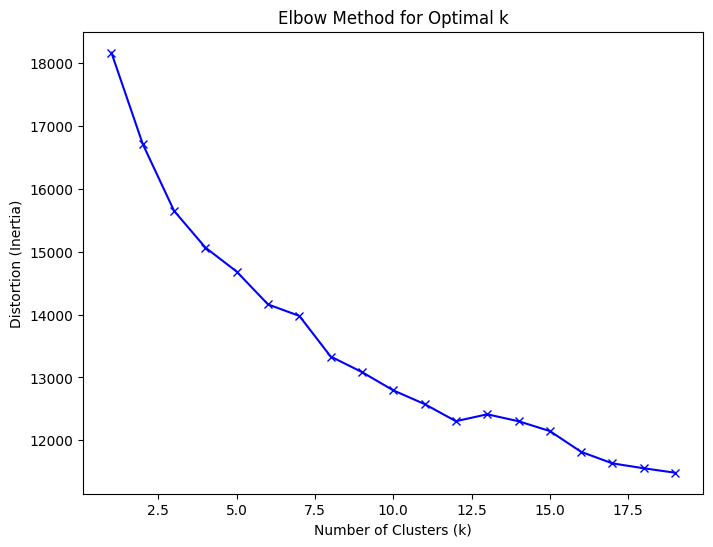

In [110]:
from sklearn_extra.cluster import KMedoids
data_clustering = x_scaled.copy()
# Menggunakan Elbow Method untuk menentukan jumlah cluster terbaik
distortions = []
K = range(1, 20)

for k in K:
    kmedoids = KMedoids(n_clusters=k, random_state=0)
    kmedoids.fit(data_clustering)
    distortions.append(kmedoids.inertia_)

# Plot Elbow Method
plt.figure(figsize=(8, 6))
plt.plot(K, distortions, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Distortion (Inertia)')
plt.title('Elbow Method for Optimal k')
plt.show()

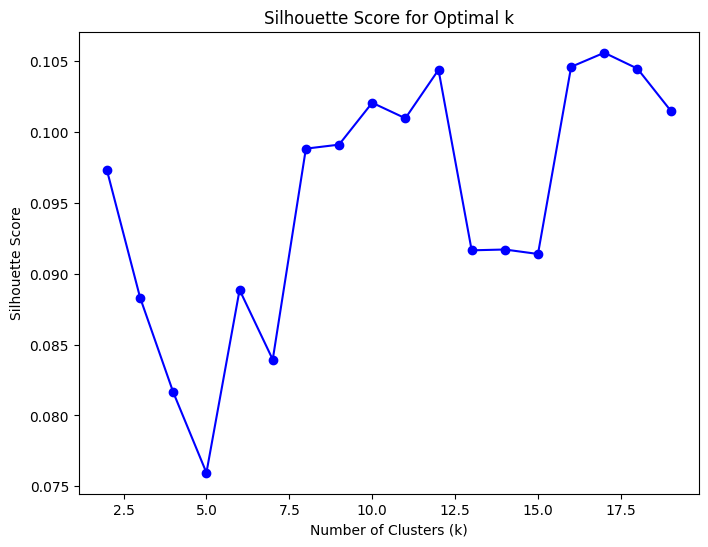

In [112]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
K = range(2, 20)

for k in K:
    kmedoids = KMedoids(n_clusters=k, random_state=0)
    cluster_labels = kmedoids.fit_predict(data_clustering)
    silhouette_avg = silhouette_score(data_clustering, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot Silhouette Score
plt.figure(figsize=(8, 6))
plt.plot(K, silhouette_scores, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal k')
plt.show()

### Modelling

In [113]:
# modelling
best_k = 6 # berdasarkan elbow method dan silhouette score
kmedoids = KMedoids(n_clusters=best_k, random_state=0)
cluster_labels = kmedoids.fit_predict(data_clustering)

In [114]:
# Menambahkan hasil clustering ke dataset
hasil_KMedoids = data_clustering.copy()
hasil_KMedoids['Cluster'] = kmedoids.labels_
hasil_KMedoids

CreditScore       Age  Tenure   Balance  NumOfProducts  IsActiveMember  \
0       -0.246269  0.416667   -0.75 -0.761480            0.0               1   
1       -0.328358  0.333333   -1.00 -0.104906            0.0               1   
2       -1.119403  0.416667    0.75  0.489346            2.0               0   
3        0.350746  0.166667   -1.00 -0.761480            1.0               0   
4        1.477612  0.500000   -0.75  0.221806            0.0               1   
...           ...       ...     ...       ...            ...             ...   
9995     0.888060  0.166667    0.00 -0.761480            1.0               0   
9996    -1.014925 -0.166667    1.25 -0.312031            0.0               1   
9997     0.425373 -0.083333    0.50 -0.761480            0.0               1   
9998     0.895522  0.416667   -0.50 -0.173319            1.0               0   
9999     1.044776 -0.750000   -0.25  0.258094            0.0               0   

      EstimatedSalary  Cluster  
0            0.011739        1  
1            0.125512        1  
2            0.139630        0  
3           -0.064717        4  
4           -0.214561        1  
...               ...      ...  
9995        -0.039876        0  
9996         0.015306        3  
9997        -0.590615        1  
9998        -0.074252        0  
9999        -0.630202        1  

[10000 rows x 8 columns]

### Visualisasi Clustering

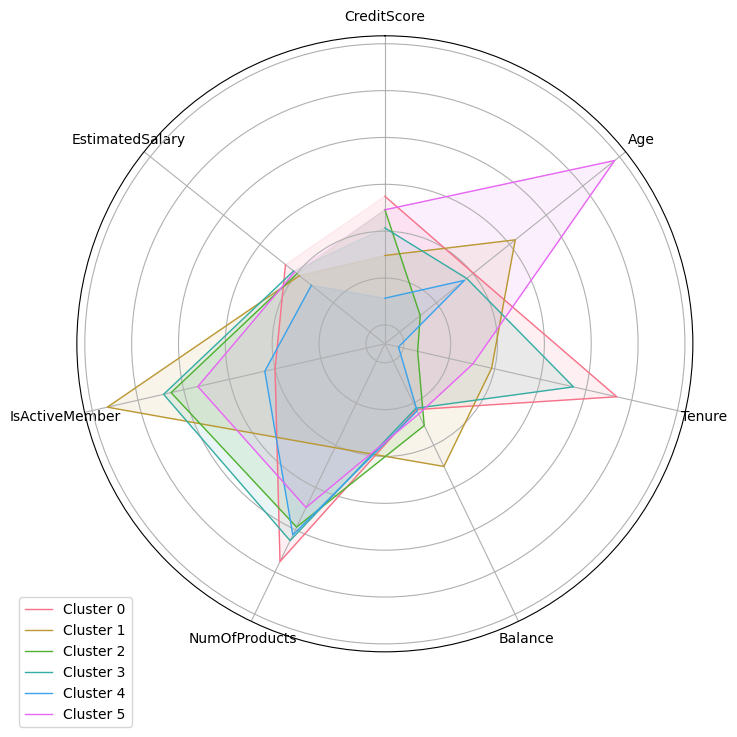

In [115]:
# visualisasi clustering
v_kmedoids = x_scaled.copy()
v_kmedoids['Cluster'] = kmedoids.labels_

cluster_data = v_kmedoids.groupby('Cluster').sum()

fn = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
      'IsActiveMember', 'EstimatedSalary']

num_clusters = cluster_data.shape[0]

# Radar chart untuk setiap cluster
angles = np.linspace(0, 2 * np.pi, len(fn), endpoint=False).tolist()
plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

colors = sns.color_palette("husl", num_clusters)

for i in range(num_clusters):
    values = cluster_data.iloc[i][fn].tolist()

    ax.plot(angles, values, linewidth=1, linestyle='solid', label=f'Cluster {i}', color=colors[i])
    ax.fill(angles, values, alpha=0.1, color=colors[i])

ax.set_yticklabels([])
plt.xticks(angles, fn)
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

plt.show()

### Evaluasi Model

In [116]:
# Evaluasi Model
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Silhouette Score
silhouette_avg = silhouette_score(data_clustering, kmedoids.labels_)

# Davies-Bouldin Index
db_index = davies_bouldin_score(data_clustering, kmedoids.labels_)

# Calinski-Harabasz Index
ch_index = calinski_harabasz_score(data_clustering, kmedoids.labels_)

# Menampilkan hasil evaluasi
print(f'Silhouette Score: {silhouette_avg}')
print(f'Davies-Bouldin Index: {db_index}')
print(f'Calinski-Harabasz Index: {ch_index}')

Silhouette Score: 0.08885171544958911
Davies-Bouldin Index: 2.237114535070614
Calinski-Harabasz Index: 979.6441079003212


# DBSCAN

In [117]:
#dataset
x

CreditScore   Age  Tenure    Balance  NumOfProducts  IsActiveMember  \
0           619.0  42.0     2.0       0.00            1.0               1   
1           608.0  41.0     1.0   83807.86            1.0               1   
2           502.0  42.0     8.0  159660.80            3.0               0   
3           699.0  39.0     1.0       0.00            2.0               0   
4           850.0  43.0     2.0  125510.82            1.0               1   
...           ...   ...     ...        ...            ...             ...   
9995        771.0  39.0     5.0       0.00            2.0               0   
9996        516.0  35.0    10.0   57369.61            1.0               1   
9997        709.0  36.0     7.0       0.00            1.0               1   
9998        772.0  42.0     3.0   75075.31            2.0               0   
9999        792.0  28.0     4.0  130142.79            1.0               0   

      EstimatedSalary  
0           101348.88  
1           112542.58  
2           113931.57  
3            93826.63  
4            79084.10  
...               ...  
9995         96270.64  
9996        101699.77  
9997         42085.58  
9998         92888.52  
9999         38190.78  

[10000 rows x 7 columns]

## Feature Transformation: Robust Scalling

In [118]:
# Robust Scalling
from sklearn.preprocessing import RobustScaler

x_scaled = x.copy()
float_columns = x.select_dtypes(include=['float64']) #scalling data pada kolom numerik

scaler = RobustScaler()
scaled_data = scaler.fit_transform(float_columns)

x_scaled[float_columns.columns] = scaled_data

## Modelling

In [159]:
from sklearn.cluster import DBSCAN
import numpy as np

# Model DBSCAN
data_dbscan = x_scaled.copy()
dbscan = DBSCAN()

data_dbscan = np.array(data_dbscan)

# Melakukan clustering
dbscan.fit(data_dbscan)

DBSCAN()

In [160]:
# Menambahkan hasil clustering ke dataset
hasil_dbscan = dataa.copy()
hasil_dbscan['Cluster'] = dbscan.labels_
hasil_dbscan

CreditScore   Age  Tenure    Balance  NumOfProducts  IsActiveMember  \
0           619.0  42.0     2.0       0.00            1.0               1   
1           608.0  41.0     1.0   83807.86            1.0               1   
2           502.0  42.0     8.0  159660.80            3.0               0   
3           699.0  39.0     1.0       0.00            2.0               0   
4           850.0  43.0     2.0  125510.82            1.0               1   
...           ...   ...     ...        ...            ...             ...   
9995        771.0  39.0     5.0       0.00            2.0               0   
9996        516.0  35.0    10.0   57369.61            1.0               1   
9997        709.0  36.0     7.0       0.00            1.0               1   
9998        772.0  42.0     3.0   75075.31            2.0               0   
9999        792.0  28.0     4.0  130142.79            1.0               0   

      EstimatedSalary  Exited  Cluster  
0           101348.88       1        0  
1           112542.58       0        0  
2           113931.57       1       -1  
3            93826.63       0        1  
4            79084.10       0        0  
...               ...     ...      ...  
9995         96270.64       0        1  
9996        101699.77       0        0  
9997         42085.58       1        0  
9998         92888.52       1        1  
9999         38190.78       0        3  

[10000 rows x 9 columns]

In [161]:
hasil_dbscan['Cluster'].unique() # -1 merupakan noise

array([ 0, -1,  1,  2,  3,  4,  5, 21,  6,  7,  8,  9, 12, 10, 14, 15, 16,
       23, 11, 13, 20, 18, 17, 22, 19, 24])

## Visualisasi Clustering

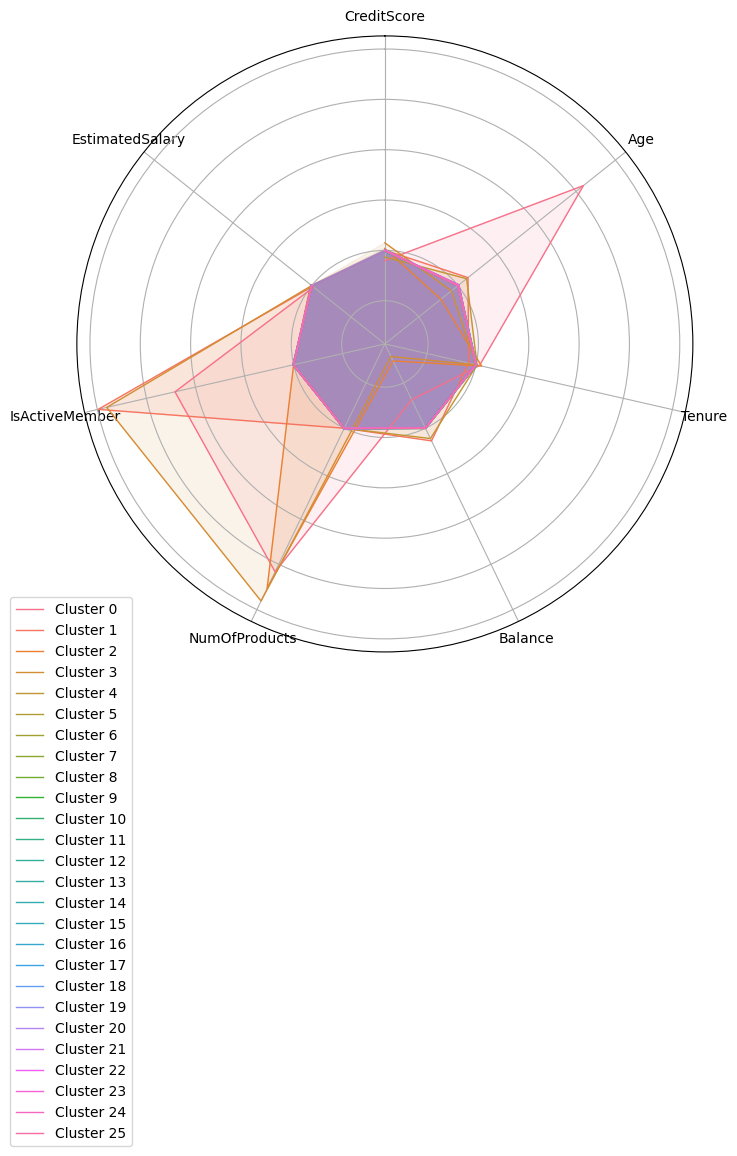

In [162]:
# visualisasi clustering
v_dbscan = x_scaled.copy()
v_dbscan['Cluster'] = dbscan.labels_

cluster_data = v_dbscan.groupby('Cluster').sum()

fn = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
      'IsActiveMember', 'EstimatedSalary']

num_clusters = cluster_data.shape[0]

# Radar chart untuk setiap cluster
angles = np.linspace(0, 2 * np.pi, len(fn), endpoint=False).tolist()

plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

colors = sns.color_palette("husl", num_clusters)

for i in range(num_clusters):
    values = cluster_data.iloc[i][fn].tolist()

    ax.plot(angles, values, linewidth=1, linestyle='solid', label=f'Cluster {i}', color=colors[i])
    ax.fill(angles, values, alpha=0.1, color=colors[i])

ax.set_yticklabels([])
plt.xticks(angles, fn)
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

plt.show()

## Evaluation Model

In [163]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Evaluasi clustering menggunakan metrik
silhouette_avg = silhouette_score(data_dbscan, dbscan.labels_)
davies_bouldin = davies_bouldin_score(data_dbscan, dbscan.labels_)
calinski_harabasz = calinski_harabasz_score(data_dbscan, dbscan.labels_)


# Menampilkan hasil evaluasi
print("Silhouette Score:", silhouette_avg)
print("Davies-Bouldin Index:", davies_bouldin)
print("Calinski-Harabasz Index:", calinski_harabasz)

Silhouette Score: -0.274245757449081
Davies-Bouldin Index: 1.7395254464320662
Calinski-Harabasz Index: 94.45348089676725


# Complete Linkage

In [164]:
#dataset
x

CreditScore   Age  Tenure    Balance  NumOfProducts  IsActiveMember  \
0           619.0  42.0     2.0       0.00            1.0               1   
1           608.0  41.0     1.0   83807.86            1.0               1   
2           502.0  42.0     8.0  159660.80            3.0               0   
3           699.0  39.0     1.0       0.00            2.0               0   
4           850.0  43.0     2.0  125510.82            1.0               1   
...           ...   ...     ...        ...            ...             ...   
9995        771.0  39.0     5.0       0.00            2.0               0   
9996        516.0  35.0    10.0   57369.61            1.0               1   
9997        709.0  36.0     7.0       0.00            1.0               1   
9998        772.0  42.0     3.0   75075.31            2.0               0   
9999        792.0  28.0     4.0  130142.79            1.0               0   

      EstimatedSalary  
0           101348.88  
1           112542.58  
2           113931.57  
3            93826.63  
4            79084.10  
...               ...  
9995         96270.64  
9996        101699.77  
9997         42085.58  
9998         92888.52  
9999         38190.78  

[10000 rows x 7 columns]

## Feature Transformation : Robust Scalling

In [165]:
# Robust Scalling
from sklearn.preprocessing import RobustScaler

x_scaled = x.copy()
float_columns = x.select_dtypes(include=['float64']) #scalling data pada kolom numerik

scaler = RobustScaler()
scaled_data = scaler.fit_transform(float_columns)

x_scaled[float_columns.columns] = scaled_data

## Penentuan Jumlah Cluster Terbaik

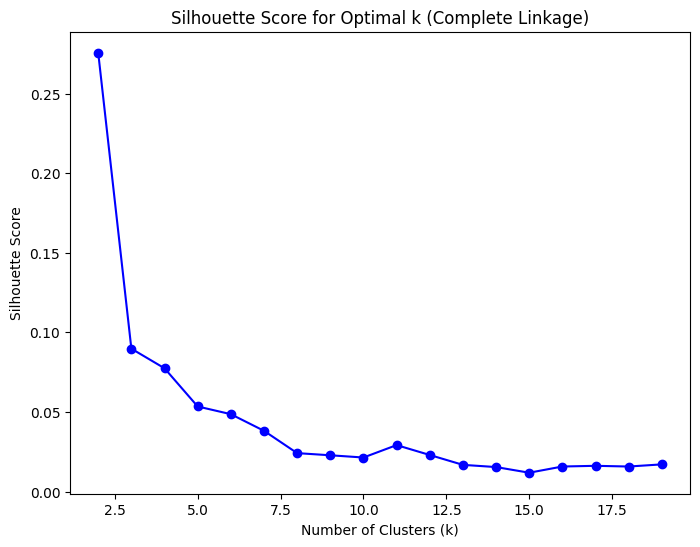

In [167]:
from sklearn.metrics import silhouette_score

# Menghitung Silhouette Score untuk berbagai jumlah cluster
silhouette_scores = []
K = range(2, 20)

for k in K:
    agg_clustering = AgglomerativeClustering(n_clusters=k, linkage='complete')
    cluster_labels = agg_clustering.fit_predict(data_cl)
    silhouette_avg = silhouette_score(data_cl, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot Silhouette Score
plt.figure(figsize=(8, 6))
plt.plot(K, silhouette_scores, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal k (Complete Linkage)')
plt.show()

## Modelling

In [179]:
# Modelling
num_cl = 3  # jumlah cluster terbaik berdasarkan silhouette score
agg_clustering = AgglomerativeClustering(n_clusters=num_cl, linkage='complete')
cl_clusters = agg_clustering.fit_predict(data_cl)

In [180]:
# Menambahkan hasil clustering ke dataset
hasil_cl = dataa.copy()
hasil_cl['Cluster'] = cl_clusters
hasil_cl

CreditScore   Age  Tenure    Balance  NumOfProducts  IsActiveMember  \
0           619.0  42.0     2.0       0.00            1.0               1   
1           608.0  41.0     1.0   83807.86            1.0               1   
2           502.0  42.0     8.0  159660.80            3.0               0   
3           699.0  39.0     1.0       0.00            2.0               0   
4           850.0  43.0     2.0  125510.82            1.0               1   
...           ...   ...     ...        ...            ...             ...   
9995        771.0  39.0     5.0       0.00            2.0               0   
9996        516.0  35.0    10.0   57369.61            1.0               1   
9997        709.0  36.0     7.0       0.00            1.0               1   
9998        772.0  42.0     3.0   75075.31            2.0               0   
9999        792.0  28.0     4.0  130142.79            1.0               0   

      EstimatedSalary  Exited  Cluster  
0           101348.88       1        0  
1           112542.58       0        0  
2           113931.57       1        0  
3            93826.63       0        0  
4            79084.10       0        0  
...               ...     ...      ...  
9995         96270.64       0        0  
9996        101699.77       0        0  
9997         42085.58       1        0  
9998         92888.52       1        0  
9999         38190.78       0        0  

[10000 rows x 9 columns]

In [181]:
hasil_cl['Cluster'].unique()

array([0, 2, 1])

## Visualisasi Clustering

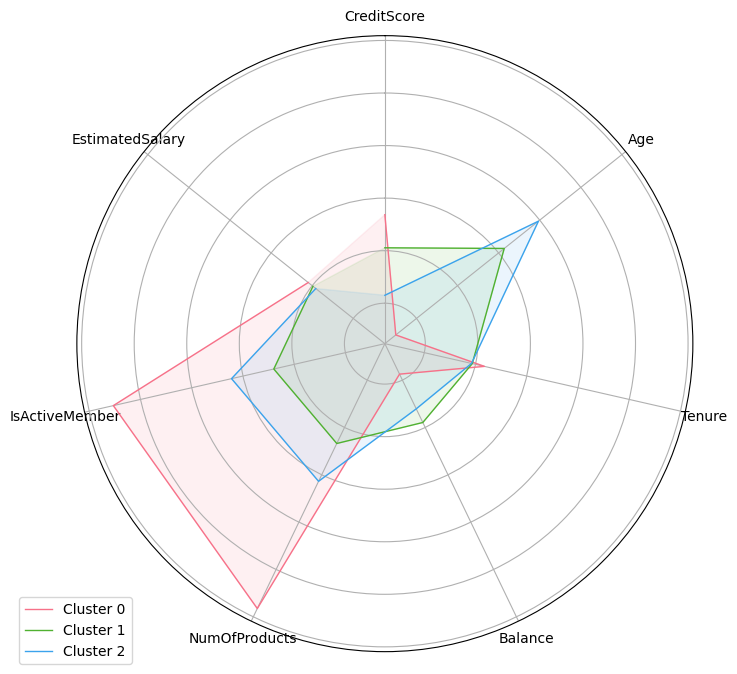

In [182]:
# visualisasi clustering
v_cl = x_scaled.copy()
v_cl['Cluster'] = cl_clusters

cluster_data = v_cl.groupby('Cluster').sum()

fn = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
      'IsActiveMember', 'EstimatedSalary']

num_clusters = cluster_data.shape[0]

# Radar chart untuk setiap cluster
angles = np.linspace(0, 2 * np.pi, len(fn), endpoint=False).tolist()

plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

colors = sns.color_palette("husl", num_clusters)

for i in range(num_clusters):
    values = cluster_data.iloc[i][fn].tolist()

    ax.plot(angles, values, linewidth=1, linestyle='solid', label=f'Cluster {i}', color=colors[i])
    ax.fill(angles, values, alpha=0.1, color=colors[i])

ax.set_yticklabels([])
plt.xticks(angles, fn)
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

plt.show()

## Evaluation Model

In [183]:
# Evaluasi clustering menggunakan metrik
silhouette_avg = silhouette_score(data_cl, cl_clusters)
davies_bouldin = davies_bouldin_score(data_cl, cl_clusters)
calinski_harabasz = calinski_harabasz_score(data_cl, cl_clusters)

# Menampilkan hasil evaluasi
print("Silhouette Score:", silhouette_avg)
print("Davies-Bouldin Index:", davies_bouldin)
print("Calinski-Harabasz Index:", calinski_harabasz)

Silhouette Score: 0.08974213625718819
Davies-Bouldin Index: 2.5953736312902556
Calinski-Harabasz Index: 921.0601815261937


# GMM

In [184]:
#dataset
x

CreditScore   Age  Tenure    Balance  NumOfProducts  IsActiveMember  \
0           619.0  42.0     2.0       0.00            1.0               1   
1           608.0  41.0     1.0   83807.86            1.0               1   
2           502.0  42.0     8.0  159660.80            3.0               0   
3           699.0  39.0     1.0       0.00            2.0               0   
4           850.0  43.0     2.0  125510.82            1.0               1   
...           ...   ...     ...        ...            ...             ...   
9995        771.0  39.0     5.0       0.00            2.0               0   
9996        516.0  35.0    10.0   57369.61            1.0               1   
9997        709.0  36.0     7.0       0.00            1.0               1   
9998        772.0  42.0     3.0   75075.31            2.0               0   
9999        792.0  28.0     4.0  130142.79            1.0               0   

      EstimatedSalary  
0           101348.88  
1           112542.58  
2           113931.57  
3            93826.63  
4            79084.10  
...               ...  
9995         96270.64  
9996        101699.77  
9997         42085.58  
9998         92888.52  
9999         38190.78  

[10000 rows x 7 columns]

### Feature Transformation : Robust Scalling

In [185]:
# Robust Scalling
from sklearn.preprocessing import RobustScaler

x_scaled = x.copy()
float_columns = x.select_dtypes(include=['float64']) #scalling data pada kolom numerik

scaler = RobustScaler()
scaled_data = scaler.fit_transform(float_columns)

x_scaled[float_columns.columns] = scaled_data

### Penentuan Jumlah Component Terbaik

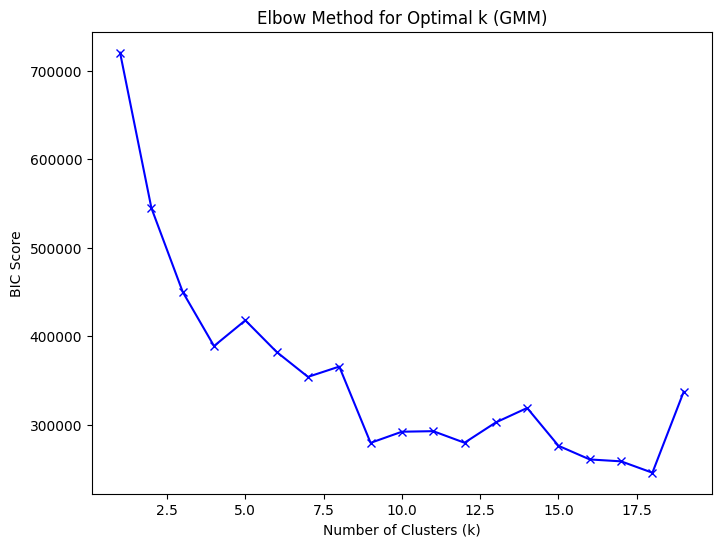

In [186]:
from sklearn.mixture import GaussianMixture

data_gmm = x_scaled.copy()
# Menggunakan Elbow Method untuk menentukan jumlah cluster terbaik
bic_scores = []
K = range(1, 20)

for k in K:
    gmm = GaussianMixture(n_components=k, random_state=0)
    gmm.fit(data)
    bic_scores.append(gmm.bic(data))

# Plot Elbow Method
plt.figure(figsize=(8, 6))
plt.plot(K, bic_scores, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('BIC Score')
plt.title('Elbow Method for Optimal k (GMM)')
plt.show()

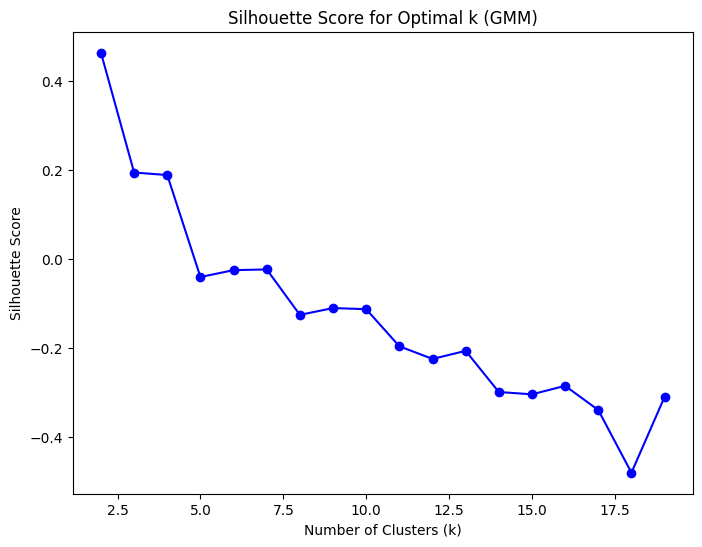

In [188]:
from sklearn.metrics import silhouette_score

# Menghitung Silhouette Score untuk berbagai jumlah cluster
silhouette_scores = []
K = range(2, 20)

for k in K:
    gmm = GaussianMixture(n_components=k, random_state=0)
    cluster_labels = gmm.fit_predict(data)
    silhouette_avg = silhouette_score(data, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot Silhouette Score
plt.figure(figsize=(8, 6))
plt.plot(K, silhouette_scores, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal k (GMM)')
plt.show()

## Modelling

In [190]:
# Fit the model
gmm = GaussianMixture(n_components=3, covariance_type='full', random_state=0) # jumlah componen terbaik = 3 berdasarkan silhouette score
gmm.fit(data_gmm)

# cluster
gmm_clusters = gmm.predict(data_gmm)
np.unique(gmm_clusters, return_counts=True)

(array([0, 1, 2]), array([1457, 4250, 4293]))

In [191]:
# Menambahkan hasil clustering ke dataset
hasil_gmm = dataa.copy()
hasil_gmm['Cluster'] = gmm_clusters
hasil_gmm

CreditScore   Age  Tenure    Balance  NumOfProducts  IsActiveMember  \
0           619.0  42.0     2.0       0.00            1.0               1   
1           608.0  41.0     1.0   83807.86            1.0               1   
2           502.0  42.0     8.0  159660.80            3.0               0   
3           699.0  39.0     1.0       0.00            2.0               0   
4           850.0  43.0     2.0  125510.82            1.0               1   
...           ...   ...     ...        ...            ...             ...   
9995        771.0  39.0     5.0       0.00            2.0               0   
9996        516.0  35.0    10.0   57369.61            1.0               1   
9997        709.0  36.0     7.0       0.00            1.0               1   
9998        772.0  42.0     3.0   75075.31            2.0               0   
9999        792.0  28.0     4.0  130142.79            1.0               0   

      EstimatedSalary  Exited  Cluster  
0           101348.88       1        1  
1           112542.58       0        1  
2           113931.57       1        0  
3            93826.63       0        1  
4            79084.10       0        1  
...               ...     ...      ...  
9995         96270.64       0        1  
9996        101699.77       0        2  
9997         42085.58       1        2  
9998         92888.52       1        1  
9999         38190.78       0        1  

[10000 rows x 9 columns]

## Visualisasi Clustering

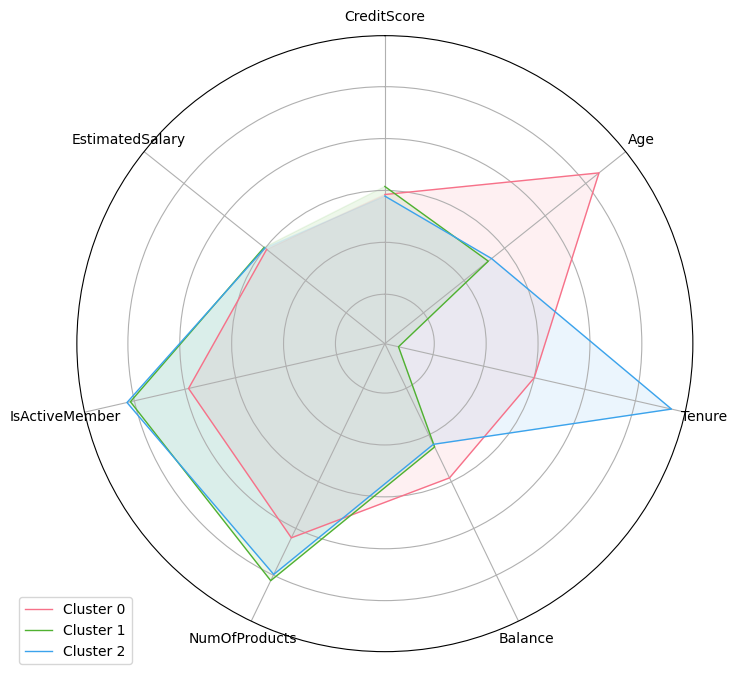

In [193]:
# visualisasi clustering
v_gmm = x_scaled.copy()
v_gmm['Cluster'] = gmm_clusters

cluster_data = v_gmm.groupby('Cluster').sum()

fn = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
      'IsActiveMember', 'EstimatedSalary']

num_clusters = cluster_data.shape[0]

# Radar chart untuk setiap cluster
angles = np.linspace(0, 2 * np.pi, len(fn), endpoint=False).tolist()

plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

colors = sns.color_palette("husl", num_clusters)

for i in range(num_clusters):
    values = cluster_data.iloc[i][fn].tolist()

    ax.plot(angles, values, linewidth=1, linestyle='solid', label=f'Cluster {i}', color=colors[i])
    ax.fill(angles, values, alpha=0.1, color=colors[i])

ax.set_yticklabels([])
plt.xticks(angles, fn)
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

plt.show()

## Evaluation Model

In [194]:
# Evaluasi clustering menggunakan metrik
silhouette_avg = silhouette_score(data_gmm, gmm_clusters)
davies_bouldin = davies_bouldin_score(data_gmm, gmm_clusters)
calinski_harabasz = calinski_harabasz_score(data_gmm, gmm_clusters)

# Menampilkan hasil evaluasi
print("Silhouette Score:", silhouette_avg)
print("Davies-Bouldin Index:", davies_bouldin)
print("Calinski-Harabasz Index:", calinski_harabasz)

Silhouette Score: 0.13906757629993202
Davies-Bouldin Index: 2.067814914249324
Calinski-Harabasz Index: 1575.6142286247925


# Clustering : Handle Outlier dengan IQR

In [206]:
dataa

CreditScore   Age  Tenure    Balance  NumOfProducts  IsActiveMember  \
0           619.0  42.0     2.0       0.00            1.0               1   
1           608.0  41.0     1.0   83807.86            1.0               1   
2           502.0  42.0     8.0  159660.80            3.0               0   
3           699.0  39.0     1.0       0.00            2.0               0   
4           850.0  43.0     2.0  125510.82            1.0               1   
...           ...   ...     ...        ...            ...             ...   
9995        771.0  39.0     5.0       0.00            2.0               0   
9996        516.0  35.0    10.0   57369.61            1.0               1   
9997        709.0  36.0     7.0       0.00            1.0               1   
9998        772.0  42.0     3.0   75075.31            2.0               0   
9999        792.0  28.0     4.0  130142.79            1.0               0   

      EstimatedSalary  Exited  
0           101348.88       1  
1           112542.58       0  
2           113931.57       1  
3            93826.63       0  
4            79084.10       0  
...               ...     ...  
9995         96270.64       0  
9996        101699.77       0  
9997         42085.58       1  
9998         92888.52       1  
9999         38190.78       0  

[10000 rows x 8 columns]

In [207]:
# data yang dipakai data yang outliernya diatasi dengan IQR
data_to = dataa.copy()
x_ho = data_to.drop('Exited', axis =  1)

In [208]:
#Handle Outlier
# Kolom dengan outlier
kolom_outlier = ['CreditScore', 'Age', 'NumOfProducts']

# Mengatasi Outlier
for k in kolom_outlier:
    Q1 = x_ho[k].quantile(0.25)
    Q3 = x_ho[k].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    x_ho[k] = np.where(x_ho[k] > upper_bound, upper_bound, x_ho[k])
    x_ho[k] = np.where(x_ho[k] < lower_bound, lower_bound, x_ho[k])

x_ho

CreditScore   Age  Tenure    Balance  NumOfProducts  IsActiveMember  \
0           619.0  42.0     2.0       0.00            1.0               1   
1           608.0  41.0     1.0   83807.86            1.0               1   
2           502.0  42.0     8.0  159660.80            3.0               0   
3           699.0  39.0     1.0       0.00            2.0               0   
4           850.0  43.0     2.0  125510.82            1.0               1   
...           ...   ...     ...        ...            ...             ...   
9995        771.0  39.0     5.0       0.00            2.0               0   
9996        516.0  35.0    10.0   57369.61            1.0               1   
9997        709.0  36.0     7.0       0.00            1.0               1   
9998        772.0  42.0     3.0   75075.31            2.0               0   
9999        792.0  28.0     4.0  130142.79            1.0               0   

      EstimatedSalary  
0           101348.88  
1           112542.58  
2           113931.57  
3            93826.63  
4            79084.10  
...               ...  
9995         96270.64  
9996        101699.77  
9997         42085.58  
9998         92888.52  
9999         38190.78  

[10000 rows x 7 columns]

# K-Means

## Feature Transformation : Standarization

In [209]:
# Standarisasi
from sklearn.preprocessing import StandardScaler

x_std = x_ho.copy()
float_columns = x_ho.select_dtypes(include=['float64']) #scalling data pada kolom numerik

std_scaler = StandardScaler()
scaled_std = std_scaler.fit_transform(float_columns)

x_std[float_columns.columns] = scaled_std

## Penentuan Jumlah Cluster Terbaik

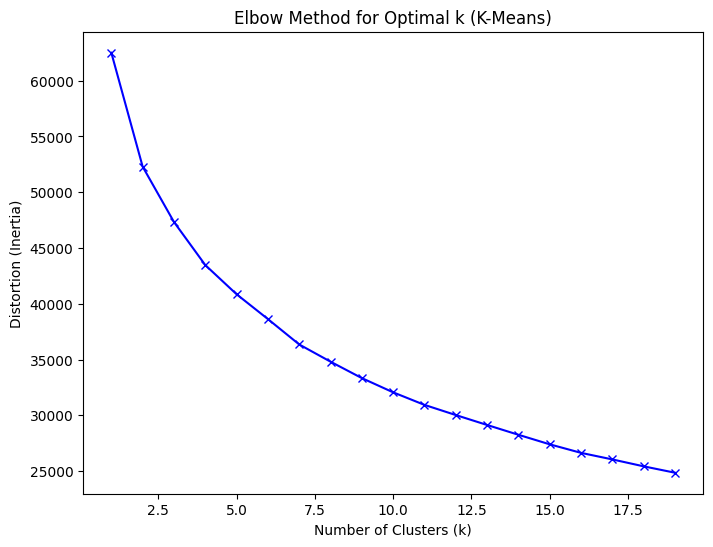

In [210]:
from sklearn.cluster import KMeans

data_kmeans = x_std.copy()
# Menggunakan Elbow Method untuk menentukan jumlah cluster terbaik
distortions = []
K = range(1, 20)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(data_kmeans)
    distortions.append(kmeans.inertia_)

# Plot Elbow Method
plt.figure(figsize=(8, 6))
plt.plot(K, distortions, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Distortion (Inertia)')
plt.title('Elbow Method for Optimal k (K-Means)')
plt.show()

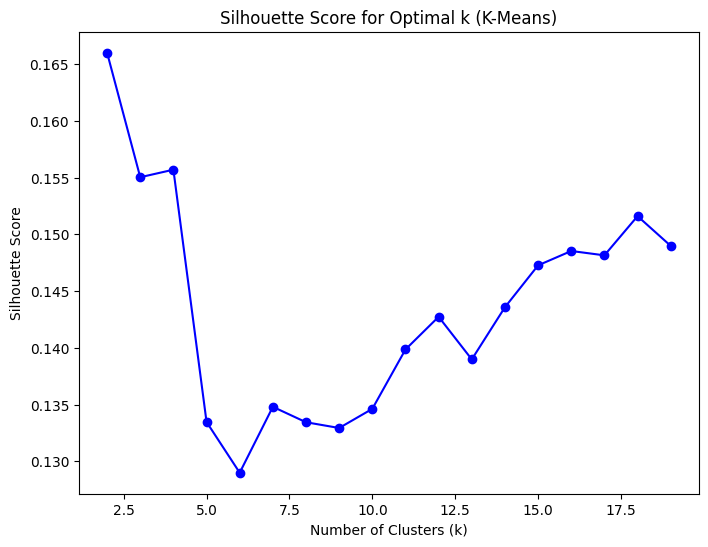

In [211]:
from sklearn.metrics import silhouette_score

# Menghitung Silhouette Score untuk berbagai jumlah cluster
silhouette_scores = []
K = range(2, 20)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0)
    cluster_labels = kmeans.fit_predict(data_kmeans)
    silhouette_avg = silhouette_score(data_kmeans, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot Silhouette Score
plt.figure(figsize=(8, 6))
plt.plot(K, silhouette_scores, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal k (K-Means)')
plt.show()

## Modelling

In [215]:
best_km = 4  # jumlah cluster terbaik berdasarkan silhouette score
kmeans_o = KMeans(n_clusters=best_km, random_state=0)
kmeans_o.labels_ = kmeans.fit_predict(data_kmeans)

In [216]:
# Menambahkan hasil clustering ke dataset
hasil_KMeans = dataa.copy()
hasil_KMeans['Cluster'] = kmeans_o.labels_
hasil_KMeans

CreditScore   Age  Tenure    Balance  NumOfProducts  IsActiveMember  \
0           619.0  42.0     2.0       0.00            1.0               1   
1           608.0  41.0     1.0   83807.86            1.0               1   
2           502.0  42.0     8.0  159660.80            3.0               0   
3           699.0  39.0     1.0       0.00            2.0               0   
4           850.0  43.0     2.0  125510.82            1.0               1   
...           ...   ...     ...        ...            ...             ...   
9995        771.0  39.0     5.0       0.00            2.0               0   
9996        516.0  35.0    10.0   57369.61            1.0               1   
9997        709.0  36.0     7.0       0.00            1.0               1   
9998        772.0  42.0     3.0   75075.31            2.0               0   
9999        792.0  28.0     4.0  130142.79            1.0               0   

      EstimatedSalary  Exited  Cluster  
0           101348.88       1        3  
1           112542.58       0        1  
2           113931.57       1        2  
3            93826.63       0        3  
4            79084.10       0        1  
...               ...     ...      ...  
9995         96270.64       0        3  
9996        101699.77       0        1  
9997         42085.58       1        3  
9998         92888.52       1        2  
9999         38190.78       0        1  

[10000 rows x 9 columns]

## Visualisasi Clustering

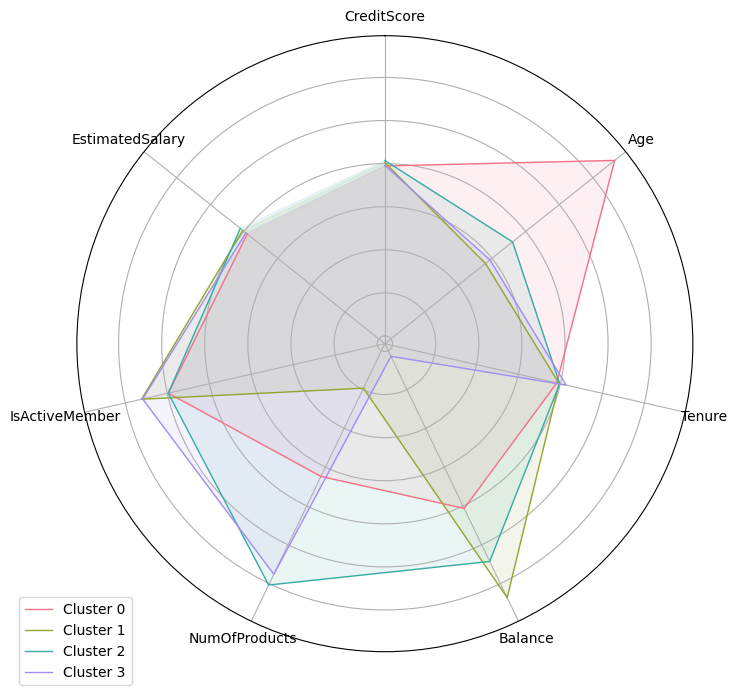

In [218]:
# visualisasi clustering
v_kmeans = x_std.copy()
v_kmeans['Cluster'] = kmeans_o.labels_

cluster_data = v_kmeans.groupby('Cluster').sum()

fn = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
      'IsActiveMember', 'EstimatedSalary']

num_clusters = cluster_data.shape[0]

# Radar chart untuk setiap cluster
angles = np.linspace(0, 2 * np.pi, len(fn), endpoint=False).tolist()

plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

colors = sns.color_palette("husl", num_clusters)

for i in range(num_clusters):
    values = cluster_data.iloc[i][fn].tolist()

    ax.plot(angles, values, linewidth=1, linestyle='solid', label=f'Cluster {i}', color=colors[i])
    ax.fill(angles, values, alpha=0.1, color=colors[i])

ax.set_yticklabels([])
plt.xticks(angles, fn)
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

plt.show()

## Evaluation Model

In [219]:
# Evaluasi clustering menggunakan metrik
silhouette_avg = silhouette_score(data_kmeans, kmeans_o.labels_)
davies_bouldin = davies_bouldin_score(data_kmeans, kmeans_o.labels_)
calinski_harabasz = calinski_harabasz_score(data_kmeans, kmeans_o.labels_)

# Menampilkan hasil evaluasi
print("Silhouette Score:", silhouette_avg)
print("Davies-Bouldin Index:", davies_bouldin)
print("Calinski-Harabasz Index:", calinski_harabasz)

Silhouette Score: 0.1556939728764813
Davies-Bouldin Index: 1.9757939208393196
Calinski-Harabasz Index: 1458.3229679973683


# K-Prototype

## Feature Transformation : Standarization

In [220]:
# Standarisasi
from sklearn.preprocessing import StandardScaler

x_std = x_ho.copy()
float_columns = x_ho.select_dtypes(include=['float64']) #scalling data pada kolom numerik

std_scaler = StandardScaler()
scaled_std = std_scaler.fit_transform(float_columns)

x_std[float_columns.columns] = scaled_std

## Penentuan Jumlah Cluster Terbaik

In [221]:
!pip install kmodes

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 1143, ncost: 54639.181299626005
Run: 1, iteration: 2/100, moves: 1306, ncost: 52895.52565281632
Run: 1, iteration: 3/100, moves: 786, ncost: 52488.39568257305
Run: 1, iteration: 4/100, moves: 346, ncost: 52387.068896065735
Run: 1, iteration: 5/100, moves: 269, ncost: 52313.75184290684
Run: 1, iteration: 6/100, moves: 141, ncost: 52294.252643418105
Run: 1, iteration: 7/100, moves: 93, ncost: 52286.07289444561
Run: 1, iteration: 8/100, moves: 46, ncost: 52284.1135614778
Run: 1, iteration: 9/100, moves: 30, ncost: 52283.31206577169
Run: 1, iteration: 10/100, moves: 8, ncost: 52283.21042317574
Run: 1, iteration: 11/100, moves: 5, ncost: 52283.190266671576
Run: 1, iteration: 12/100, moves: 0, ncost: 52283.190266671576
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, 

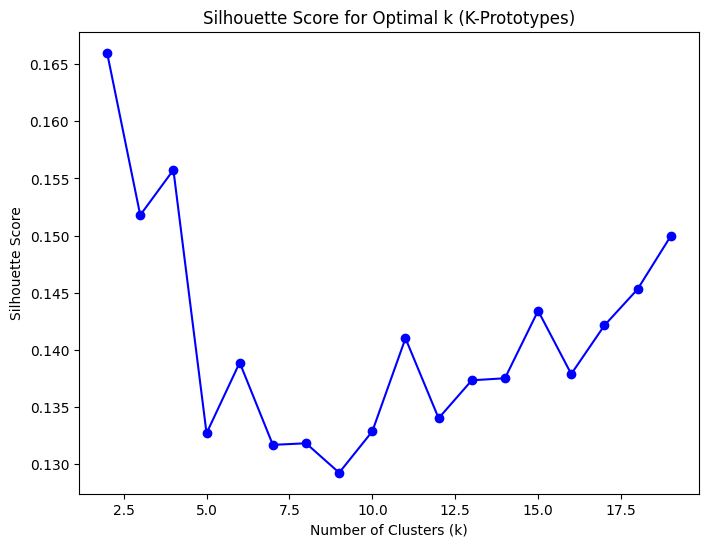

In [223]:
from kmodes.kprototypes import KPrototypes
from sklearn.metrics import silhouette_score

data_proto = x_std.copy()
# Menghitung Silhouette Score untuk berbagai jumlah cluster
silhouette_scores = []
K = range(2, 20)

for k in K:
    kproto = KPrototypes(n_clusters=k, init='Cao', n_init=5, verbose=2, random_state=0)
    labels = kproto.fit_predict(data_proto, categorical=[5])  # Indeks kolom-kolom kategorikal
    silhouette_avg = silhouette_score(data_proto, labels)
    silhouette_scores.append(silhouette_avg)

# Plot Silhouette Score
plt.figure(figsize=(8, 6))
plt.plot(K, silhouette_scores, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal k (K-Prototypes)')
plt.show()

## Modelling

In [231]:
best_kp = 4  # jumlah cluster terbaik berdasarkan silhouette score
kproto_o = KPrototypes(n_clusters=4, init='Cao', n_init=5, verbose=2, random_state=0)
kproto_o.labels_ = kproto_o.fit_predict(data_proto, categorical=[5])

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 1960, ncost: 45519.45461839341
Run: 1, iteration: 2/100, moves: 1015, ncost: 45008.936100341794
Run: 1, iteration: 3/100, moves: 675, ncost: 44824.497775511685
Run: 1, iteration: 4/100, moves: 434, ncost: 44746.842494295495
Run: 1, iteration: 5/100, moves: 291, ncost: 44709.842724189686
Run: 1, iteration: 6/100, moves: 187, ncost: 44692.533903759926
Run: 1, iteration: 7/100, moves: 114, ncost: 44686.115863317
Run: 1, iteration: 8/100, moves: 70, ncost: 44683.11438576939
Run: 1, iteration: 9/100, moves: 79, ncost: 44678.918030514586
Run: 1, iteration: 10/100, moves: 87, ncost: 44673.43160281937
Run: 1, iteration: 11/100, moves: 89, ncost: 44667.64204672132
Run: 1, iteration: 12/100, moves: 100, ncost: 44662.267797562024
Run: 1, iteration: 13/100, moves: 99, ncost: 44655.47808131137
Run: 1, iteration: 

In [232]:
np.unique(kproto_o.labels_, return_counts=True)

(array([0, 1, 2, 3], dtype=uint16), array([3318, 3165, 1959, 1558]))

In [233]:
# Menambahkan hasil clustering ke dataset
hasil_Proto = dataa.copy()
hasil_Proto['Cluster'] = kproto_o.labels_
hasil_Proto

CreditScore   Age  Tenure    Balance  NumOfProducts  IsActiveMember  \
0           619.0  42.0     2.0       0.00            1.0               1   
1           608.0  41.0     1.0   83807.86            1.0               1   
2           502.0  42.0     8.0  159660.80            3.0               0   
3           699.0  39.0     1.0       0.00            2.0               0   
4           850.0  43.0     2.0  125510.82            1.0               1   
...           ...   ...     ...        ...            ...             ...   
9995        771.0  39.0     5.0       0.00            2.0               0   
9996        516.0  35.0    10.0   57369.61            1.0               1   
9997        709.0  36.0     7.0       0.00            1.0               1   
9998        772.0  42.0     3.0   75075.31            2.0               0   
9999        792.0  28.0     4.0  130142.79            1.0               0   

      EstimatedSalary  Exited  Cluster  
0           101348.88       1        1  
1           112542.58       0        0  
2           113931.57       1        2  
3            93826.63       0        1  
4            79084.10       0        0  
...               ...     ...      ...  
9995         96270.64       0        1  
9996        101699.77       0        0  
9997         42085.58       1        1  
9998         92888.52       1        2  
9999         38190.78       0        0  

[10000 rows x 9 columns]

## Visualisasi Clustering

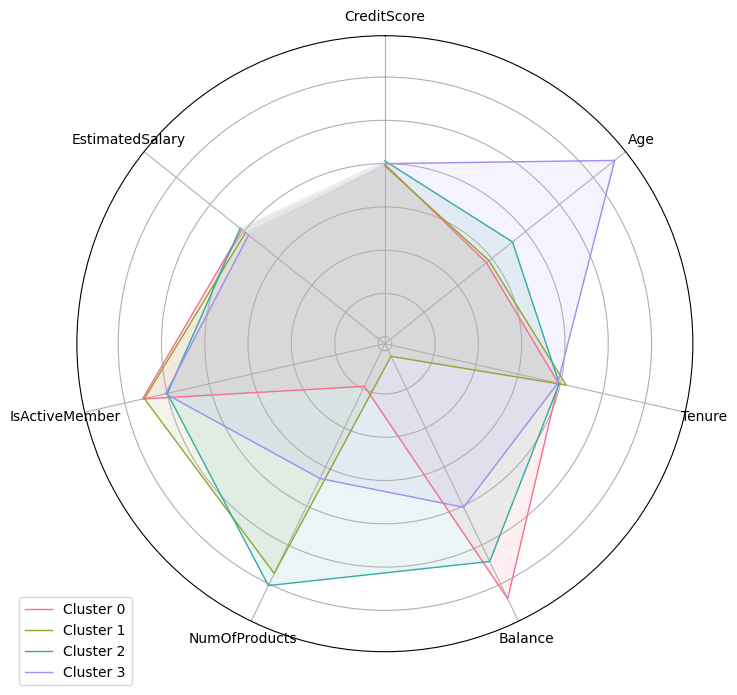

In [234]:
# visualisasi clustering
v_proto = x_std.copy()
v_proto['Cluster'] = kproto_o.labels_

cluster_data = v_proto.groupby('Cluster').sum()

fn = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
      'IsActiveMember', 'EstimatedSalary']

num_clusters = cluster_data.shape[0]

# Radar chart untuk setiap cluster
angles = np.linspace(0, 2 * np.pi, len(fn), endpoint=False).tolist()

plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

colors = sns.color_palette("husl", num_clusters)

for i in range(num_clusters):
    values = cluster_data.iloc[i][fn].tolist()

    ax.plot(angles, values, linewidth=1, linestyle='solid', label=f'Cluster {i}', color=colors[i])
    ax.fill(angles, values, alpha=0.1, color=colors[i])

ax.set_yticklabels([])
plt.xticks(angles, fn)
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

plt.show()

## Evaluation Model

In [235]:
# Evaluasi clustering menggunakan metrik
silhouette_avg = silhouette_score(data_proto, kproto_o.labels_)
davies_bouldin = davies_bouldin_score(data_proto, kproto_o.labels_)
calinski_harabasz = calinski_harabasz_score(data_proto, kproto_o.labels_)

# Menampilkan hasil evaluasi
print("Silhouette Score:", silhouette_avg)
print("Davies-Bouldin Index:", davies_bouldin)
print("Calinski-Harabasz Index:", calinski_harabasz)

Silhouette Score: 0.1557477974412836
Davies-Bouldin Index: 1.974047106930149
Calinski-Harabasz Index: 1454.921400012509


# Clustering : Outlier Dibuang

In [236]:
dataa

CreditScore   Age  Tenure    Balance  NumOfProducts  IsActiveMember  \
0           619.0  42.0     2.0       0.00            1.0               1   
1           608.0  41.0     1.0   83807.86            1.0               1   
2           502.0  42.0     8.0  159660.80            3.0               0   
3           699.0  39.0     1.0       0.00            2.0               0   
4           850.0  43.0     2.0  125510.82            1.0               1   
...           ...   ...     ...        ...            ...             ...   
9995        771.0  39.0     5.0       0.00            2.0               0   
9996        516.0  35.0    10.0   57369.61            1.0               1   
9997        709.0  36.0     7.0       0.00            1.0               1   
9998        772.0  42.0     3.0   75075.31            2.0               0   
9999        792.0  28.0     4.0  130142.79            1.0               0   

      EstimatedSalary  Exited  
0           101348.88       1  
1           112542.58       0  
2           113931.57       1  
3            93826.63       0  
4            79084.10       0  
...               ...     ...  
9995         96270.64       0  
9996        101699.77       0  
9997         42085.58       1  
9998         92888.52       1  
9999         38190.78       0  

[10000 rows x 8 columns]

In [237]:
# Drop Outlier
data_do = dataa.copy()

# Kolom yang memiliki outlier
kolom_outlier = ['CreditScore', 'Age', 'NumOfProducts']

# Function
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Menghapus outlier untuk setiap kolom dengan outlier
for j in kolom_outlier:
    data_do = remove_outliers(data_do, j)

data_do

CreditScore   Age  Tenure    Balance  NumOfProducts  IsActiveMember  \
0           619.0  42.0     2.0       0.00            1.0               1   
1           608.0  41.0     1.0   83807.86            1.0               1   
2           502.0  42.0     8.0  159660.80            3.0               0   
3           699.0  39.0     1.0       0.00            2.0               0   
4           850.0  43.0     2.0  125510.82            1.0               1   
...           ...   ...     ...        ...            ...             ...   
9995        771.0  39.0     5.0       0.00            2.0               0   
9996        516.0  35.0    10.0   57369.61            1.0               1   
9997        709.0  36.0     7.0       0.00            1.0               1   
9998        772.0  42.0     3.0   75075.31            2.0               0   
9999        792.0  28.0     4.0  130142.79            1.0               0   

      EstimatedSalary  Exited  
0           101348.88       1  
1           112542.58       0  
2           113931.57       1  
3            93826.63       0  
4            79084.10       0  
...               ...     ...  
9995         96270.64       0  
9996        101699.77       0  
9997         42085.58       1  
9998         92888.52       1  
9999         38190.78       0  

[9568 rows x 8 columns]

In [238]:
# data yang dipakai data yang outliernya didrop
x_do = data_do.drop('Exited', axis =  1)

# K-Means

## Feature Transformation : Standarization

In [239]:
# Standarisasi
from sklearn.preprocessing import StandardScaler

xo_std = x_do.copy()
float_columns = x_do.select_dtypes(include=['float64']) #scalling data pada kolom numerik

std_scaler = StandardScaler()
scaled_std = std_scaler.fit_transform(float_columns)

xo_std[float_columns.columns] = scaled_std

## Penentuan Jumlah Cluster Terbaik

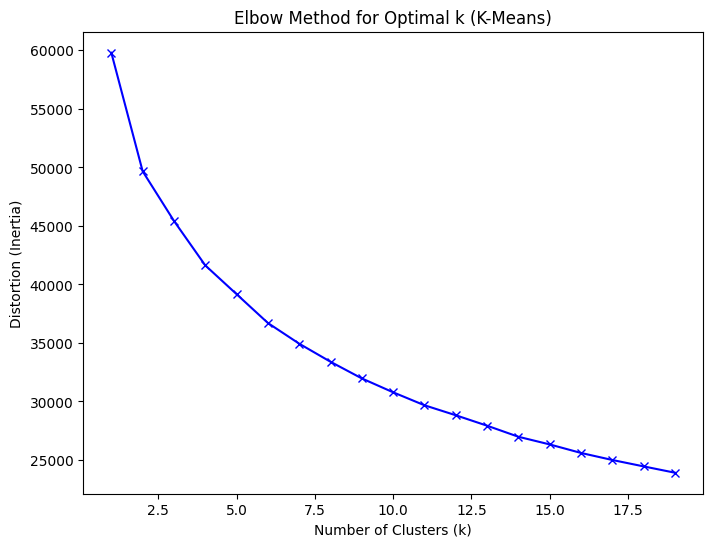

In [240]:
from sklearn.cluster import KMeans

xo_kmeans = xo_std.copy()
# Menggunakan Elbow Method untuk menentukan jumlah cluster terbaik
distortions = []
K = range(1, 20)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(xo_kmeans)
    distortions.append(kmeans.inertia_)

# Plot Elbow Method
plt.figure(figsize=(8, 6))
plt.plot(K, distortions, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Distortion (Inertia)')
plt.title('Elbow Method for Optimal k (K-Means)')
plt.show()

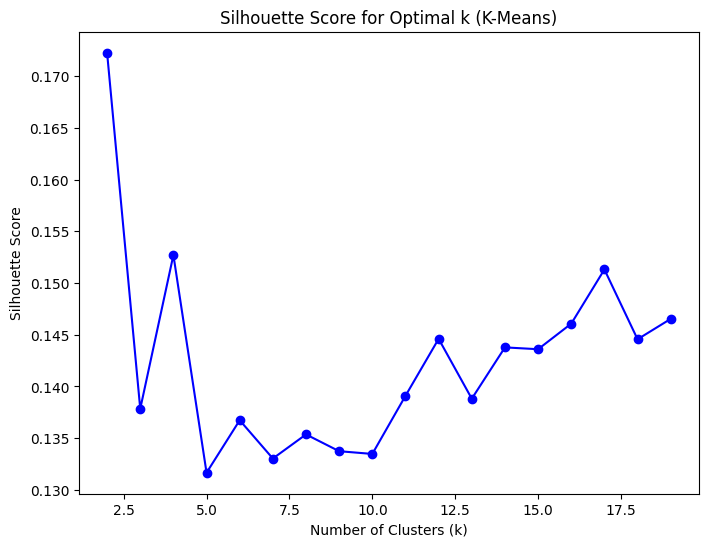

In [241]:
from sklearn.metrics import silhouette_score

# Menghitung Silhouette Score untuk berbagai jumlah cluster
silhouette_scores = []
K = range(2, 20)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0)
    cluster_labels = kmeans.fit_predict(xo_kmeans)
    silhouette_avg = silhouette_score(xo_kmeans, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot Silhouette Score
plt.figure(figsize=(8, 6))
plt.plot(K, silhouette_scores, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal k (K-Means)')
plt.show()

## Modelling

In [245]:
# KMeans
best_kmo = 3  # jumlah cluster terbaik berdasarkan silhouette score
kmeans = KMeans(n_clusters=best_kmo, random_state=0)
kmeans.labels_ = kmeans.fit_predict(xo_kmeans)

In [246]:
# Menambahkan hasil clustering ke dataset
hasil_KMeans_do = data_do.copy()
hasil_KMeans_do['Cluster'] = kmeans.labels_
hasil_KMeans_do

CreditScore   Age  Tenure    Balance  NumOfProducts  IsActiveMember  \
0           619.0  42.0     2.0       0.00            1.0               1   
1           608.0  41.0     1.0   83807.86            1.0               1   
2           502.0  42.0     8.0  159660.80            3.0               0   
3           699.0  39.0     1.0       0.00            2.0               0   
4           850.0  43.0     2.0  125510.82            1.0               1   
...           ...   ...     ...        ...            ...             ...   
9995        771.0  39.0     5.0       0.00            2.0               0   
9996        516.0  35.0    10.0   57369.61            1.0               1   
9997        709.0  36.0     7.0       0.00            1.0               1   
9998        772.0  42.0     3.0   75075.31            2.0               0   
9999        792.0  28.0     4.0  130142.79            1.0               0   

      EstimatedSalary  Exited  Cluster  
0           101348.88       1        0  
1           112542.58       0        1  
2           113931.57       1        2  
3            93826.63       0        2  
4            79084.10       0        0  
...               ...     ...      ...  
9995         96270.64       0        2  
9996        101699.77       0        1  
9997         42085.58       1        0  
9998         92888.52       1        2  
9999         38190.78       0        0  

[9568 rows x 9 columns]

## Visualisasi Clustering

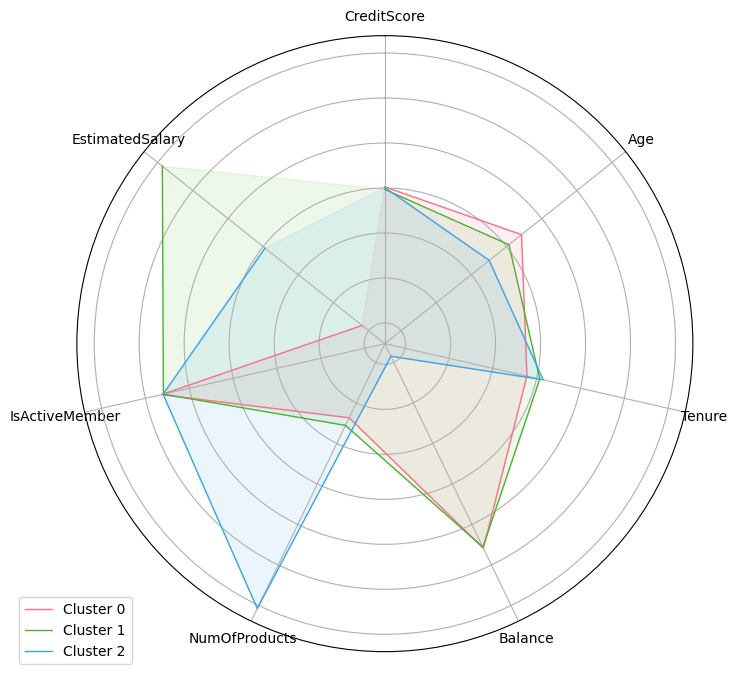

In [247]:
# visualisasi clustering
v_kmeans_do = xo_std.copy()
v_kmeans_do['Cluster'] = kmeans.labels_

cluster_data = v_kmeans_do.groupby('Cluster').sum()

fn = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
      'IsActiveMember', 'EstimatedSalary']

num_clusters = cluster_data.shape[0]

# Radar chart untuk setiap cluster
angles = np.linspace(0, 2 * np.pi, len(fn), endpoint=False).tolist()

plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

colors = sns.color_palette("husl", num_clusters)

for i in range(num_clusters):
    values = cluster_data.iloc[i][fn].tolist()

    ax.plot(angles, values, linewidth=1, linestyle='solid', label=f'Cluster {i}', color=colors[i])
    ax.fill(angles, values, alpha=0.1, color=colors[i])

ax.set_yticklabels([])
plt.xticks(angles, fn)
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

plt.show()

## Evaluation Model

In [248]:
# Evaluasi clustering menggunakan metrik
silhouette_avg = silhouette_score(xo_kmeans, kmeans.labels_)
davies_bouldin = davies_bouldin_score(xo_kmeans, kmeans.labels_)
calinski_harabasz = calinski_harabasz_score(xo_kmeans, kmeans.labels_)

# Menampilkan hasil evaluasi
print("Silhouette Score:", silhouette_avg)
print("Davies-Bouldin Index:", davies_bouldin)
print("Calinski-Harabasz Index:", calinski_harabasz)

Silhouette Score: 0.13783132242810298
Davies-Bouldin Index: 2.210996532818125
Calinski-Harabasz Index: 1513.090930484788


# K-Prototype

## Feature Transformation : Standarization

In [249]:
# Standarisasi
from sklearn.preprocessing import StandardScaler

xo_std = x_do.copy()
float_columns = x_do.select_dtypes(include=['float64']) #scalling data pada kolom numerik

std_scaler = StandardScaler()
scaled_std = std_scaler.fit_transform(float_columns)

xo_std[float_columns.columns] = scaled_std

## Penentuan Jumlah Cluster Terbaik

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 1117, ncost: 52099.602784111186
Run: 1, iteration: 2/100, moves: 1334, ncost: 50319.4934478993
Run: 1, iteration: 3/100, moves: 676, ncost: 50020.09775162399
Run: 1, iteration: 4/100, moves: 238, ncost: 49984.42042608188
Run: 1, iteration: 5/100, moves: 135, ncost: 49965.71027550858
Run: 1, iteration: 6/100, moves: 174, ncost: 49935.761753273924
Run: 1, iteration: 7/100, moves: 287, ncost: 49854.751064196964
Run: 1, iteration: 8/100, moves: 399, ncost: 49695.58974452296
Run: 1, iteration: 9/100, moves: 244, ncost: 49620.89636446602
Run: 1, iteration: 10/100, moves: 49, ncost: 49616.33484345032
Run: 1, iteration: 11/100, moves: 7, ncost: 49616.223049721746
Run: 1, iteration: 12/100, moves: 0, ncost: 49616.223049721746
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run:

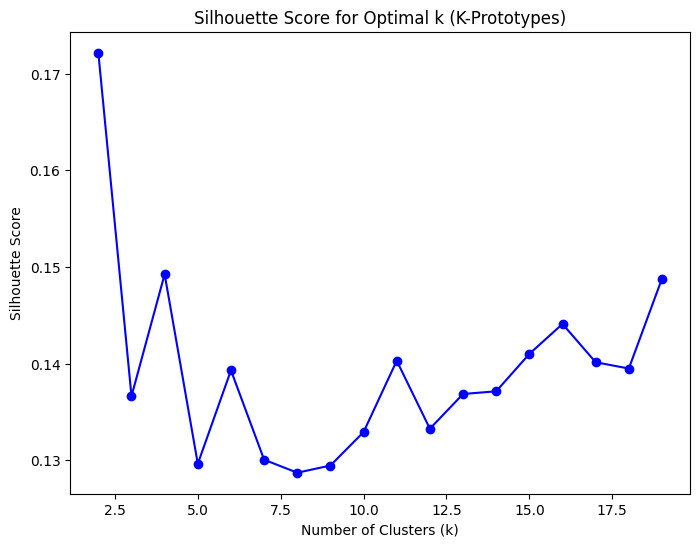

In [250]:
from kmodes.kprototypes import KPrototypes
from sklearn.metrics import silhouette_score

xo_proto = xo_std.copy()
# Menghitung Silhouette Score untuk berbagai jumlah cluster
silhouette_scores = []
K = range(2, 20)

for k in K:
    kproto = KPrototypes(n_clusters=k, init='Cao', n_init=5, verbose=2, random_state=0)
    labels = kproto.fit_predict(xo_proto, categorical=[5])  # Indeks kolom-kolom kategorikal
    silhouette_avg = silhouette_score(xo_proto, labels)
    silhouette_scores.append(silhouette_avg)

# Plot Silhouette Score
plt.figure(figsize=(8, 6))
plt.plot(K, silhouette_scores, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal k (K-Prototypes)')
plt.show()

## Modelling

In [251]:
best_kpo = 3  # jumlah cluster terbaik berdasarkan silhouette score
kproto_do = KPrototypes(n_clusters=best_kpo, init='Cao', n_init=5, verbose=2, random_state=0)
kproto_do.labels_ = kproto_do.fit_predict(xo_proto, categorical=[5])

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 1623, ncost: 46476.985376486424
Run: 1, iteration: 2/100, moves: 654, ncost: 46226.25707851812
Run: 1, iteration: 3/100, moves: 401, ncost: 46096.338808245164
Run: 1, iteration: 4/100, moves: 271, ncost: 46033.376838201446
Run: 1, iteration: 5/100, moves: 166, ncost: 46008.15324280862
Run: 1, iteration: 6/100, moves: 132, ncost: 45993.446662221024
Run: 1, iteration: 7/100, moves: 91, ncost: 45986.81284227325
Run: 1, iteration: 8/100, moves: 34, ncost: 45985.90201294538
Run: 1, iteration: 9/100, moves: 26, ncost: 45985.38568787783
Run: 1, iteration: 10/100, moves: 14, ncost: 45985.20920269217
Run: 1, iteration: 11/100, moves: 7, ncost: 45985.13508191222
Run: 1, iteration: 12/100, moves: 11, ncost: 45985.01689665928
Run: 1, iteration: 13/100, moves: 10, ncost: 45984.85719149813
Run: 1, iteration: 14/10

In [252]:
np.unique(kproto_do.labels_, return_counts=True)

(array([0, 1, 2], dtype=uint16), array([3159, 3226, 3183]))

In [253]:
# Menambahkan hasil clustering ke dataset
hasil_Proto_do = data_do.copy()
hasil_Proto_do['Cluster'] = kproto_do.labels_
hasil_Proto_do

CreditScore   Age  Tenure    Balance  NumOfProducts  IsActiveMember  \
0           619.0  42.0     2.0       0.00            1.0               1   
1           608.0  41.0     1.0   83807.86            1.0               1   
2           502.0  42.0     8.0  159660.80            3.0               0   
3           699.0  39.0     1.0       0.00            2.0               0   
4           850.0  43.0     2.0  125510.82            1.0               1   
...           ...   ...     ...        ...            ...             ...   
9995        771.0  39.0     5.0       0.00            2.0               0   
9996        516.0  35.0    10.0   57369.61            1.0               1   
9997        709.0  36.0     7.0       0.00            1.0               1   
9998        772.0  42.0     3.0   75075.31            2.0               0   
9999        792.0  28.0     4.0  130142.79            1.0               0   

      EstimatedSalary  Exited  Cluster  
0           101348.88       1        2  
1           112542.58       0        2  
2           113931.57       1        0  
3            93826.63       0        0  
4            79084.10       0        2  
...               ...     ...      ...  
9995         96270.64       0        0  
9996        101699.77       0        2  
9997         42085.58       1        2  
9998         92888.52       1        0  
9999         38190.78       0        2  

[9568 rows x 9 columns]

## Visualisasi Clustering

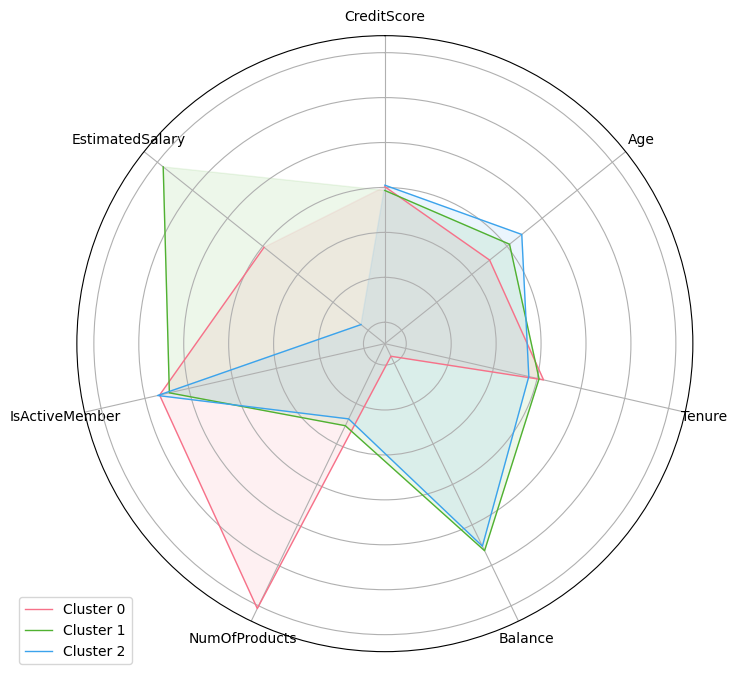

In [254]:
# visualisasi clustering
vo_proto = xo_std.copy()
vo_proto['Cluster'] = kproto_do.labels_

cluster_data = vo_proto.groupby('Cluster').sum()

fn = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
      'IsActiveMember', 'EstimatedSalary']

num_clusters = cluster_data.shape[0]

# Radar chart untuk setiap cluster
angles = np.linspace(0, 2 * np.pi, len(fn), endpoint=False).tolist()

plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

colors = sns.color_palette("husl", num_clusters)

for i in range(num_clusters):
    values = cluster_data.iloc[i][fn].tolist()

    ax.plot(angles, values, linewidth=1, linestyle='solid', label=f'Cluster {i}', color=colors[i])
    ax.fill(angles, values, alpha=0.1, color=colors[i])

ax.set_yticklabels([])
plt.xticks(angles, fn)
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

plt.show()

## Evaluation Model

In [255]:
# Evaluasi clustering menggunakan metrik
silhouette_avg = silhouette_score(xo_proto, kproto_do.labels_)
davies_bouldin = davies_bouldin_score(xo_proto, kproto_do.labels_)
calinski_harabasz = calinski_harabasz_score(xo_proto, kproto_do.labels_)

# Menampilkan hasil evaluasi
print("Silhouette Score:", silhouette_avg)
print("Davies-Bouldin Index:", davies_bouldin)
print("Calinski-Harabasz Index:", calinski_harabasz)

Silhouette Score: 0.1366322397141888
Davies-Bouldin Index: 2.2190778097430397
Calinski-Harabasz Index: 1503.2883254607927


#INTERPRETASI MODEL ERBAIK CLUSTERING DAN REKOMENDASI

**Model terbaik** : K-Prototype dengan data outlier di-handle dengan IQR.
K-Prototype memiliki nilai Silhouette Score tertinggi di antara model lainnya. Silhouette Score adalah metrik evaluasi yang digunakan untuk mengukur sejauh mana objek dalam cluster serupa satu sama lain dan berbeda dari objek dalam cluster lain.

**INTERPRETASI CLUSTER K-Prototype**
- Pada Cluster 0 profil nasabah bank adalah nasabah yang aktif, dengan balance paling tinggi, tenure lebih lama, dan memiliki credit score serta estimated salary yang tinggi tinggi. Cluster ini memiliki rentang usia yang cenderung beragam. Sementara, untuk kepemilikan produk lebih rendah.
- Pada Cluster 1 profil nasabah bank adalah nasabah aktif dengan kepemilikan jumlah produk yang tinggi, tenure sedang, estimated salary credit score sedang. Selain itu, nasabah pada cluster ini memiliki balance rendah dan usia nasabah cenderung beragam.
- Pada Cluster 2 profil nasabah adalah nasabah pasif yang kepemilikan produknya tinggi dibandingkan dengan cluster lain. Nasabah pada cluster ini juga memiliki balance lebih tinggi dibanding cluster 1 dan 3, dengan tenure sedang, estimated salary dan credit score sedang. Untuk usia, nasabah pada cluster ini cenderung beragam.
- Pada Cluster 3 nasabah cenderung pasif. Nasabah pada cluster ini memiliki usia lebih tua. Kepemilikan produk dan balance sedang. Sementara itu, lama tenure, estimated salary, dan credit score juga sedang.

**Rekomendasi**
- Meningkatkan komunikasi antara bank dengan nasabah sehingga dapat meningkatkan keaktifan dan loyalitas nasabah.
- Meningkatkan retensi pelanggan dengan menawarkan insentif atau promosi pada nasabah yang memiliki banyak produk.
- Melakukan survey kepuasan atas produk yang dimiliki nasabah yang mencakup evaluasi produk, sehingga bank dapat mengembangkan produk sesuai dengan preferensi nasabah.
- Memberikan limit kredit yang panjang bagi nasabah yang membayar tepat waktu.
- Memberi reward kepada nasabah yang setia agar memperkuat loyalitas dan memotivasi nasabah untuk tetap setia
- Menghadirkan produk dan layanan sesuai umur sehingga meningkatkan efektivitas pemasaran dan memastikan bahwa bank secara efisien memenuhi harapan nasabah.
- Melakukan promosi beragam produk bank serta manfaatnya sehingga dapat meningkatkan jumlah penggunaan produk bank oleh nasabah.
- Memberikan layanan yang lebih mudah dan cepat, seperti layanan perbankan digital yang lebih canggih dan efisien.

Setelah mencoba melakukan rekomendasi:
- Evaluasi Kebijakan Penanganan Churn Berdasarkan hasil model pihak bank bisa mengevaluasi kebijakan penindakan bagi nasabah yang cenderung akan churn.
- Menyempurnakan Strategi Pemasaran Berdasarkan hasil evaluasi kebijakan, Bank dapat menyempurnakan strategi pemasaran terkait nasabah yang memiliki kecenderungan akan churn.